## Jupyter Python notebook attached to : Refining Syntactic Distinctions Using Decision Trees: A Paper on Postnominal ’That’ in Complement vs. Relative Clauses

#### Authors:

<b>Hamady GACKOU</b>, MSc student in Data Science and  machine learning at Université Paris Cité (<a href="mailto: hamady.gackou@etu.u-paris.fr">hamady.gackou@etu.u-paris.fr</a>).<br>

<b>Nicolas BALLIER</b>, Full professor of linguistics at Université Paris Cité (<a href="mailto: nicolas.ballier@u-paris.fr">nicolas.ballier@u-paris.fr</a>).<br>

## Lab Objectives

1. **Execution of TreeTagger**: Analyze the different realizations of the word *that* (e.g., as adverb, relative pronoun, conjunction, etc.) and measure precision for each category.
2. **Retraining TreeTagger**: Use a specific tagset to distinguish the various uses of *that*.
3. **Comparative Analysis**: Compare the performance of the *Penn* and *BNC* models in TreeTagger.
4. **Precision and Recall**: Evaluate the precision and recall for annotating *that* using training and test corpora.

## We  will  import for the first step  the  required bibliothec 

In [10]:
import os
import subprocess
import pandas as pd
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import nltk
from collections import defaultdict
import warnings
import treetaggerwrapper
import seaborn as sns
import conllu
import os
import re
import matplotlib.pyplot as plt
import pandas as pd
import nltk
from nltk.corpus import brown

# Ignorer les warnings spécifiques
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=SyntaxWarning)

c:\Users\MLSD\Desktop\Projects_Folder\DataScience2_NLP\Projet_NLP\venv\Lib\site-packages\treetaggerwrapper.py:741: FutureWarning: Possible nested set at position 8
  punct2find_re = re.compile("([^ ])([[" + ALONEMARKS + "])",
c:\Users\MLSD\Desktop\Projects_Folder\DataScience2_NLP\Projet_NLP\venv\Lib\site-packages\treetaggerwrapper.py:2045: FutureWarning: Possible nested set at position 152
  DnsHostMatch_re = re.compile("(" + DnsHost_expression + ")",
c:\Users\MLSD\Desktop\Projects_Folder\DataScience2_NLP\Projet_NLP\venv\Lib\site-packages\treetaggerwrapper.py:2069: FutureWarning: Possible nested set at position 409
  UrlMatch_re = re.compile(UrlMatch_expression, re.VERBOSE | re.IGNORECASE)
c:\Users\MLSD\Desktop\Projects_Folder\DataScience2_NLP\Projet_NLP\venv\Lib\site-packages\treetaggerwrapper.py:2081: FutureWarning: Possible nested set at position 192
  EmailMatch_re = re.compile(EmailMatch_expression, re.VERBOSE | re.IGNORECASE)


## 1. TreeTagger for POS-tagging
*TreeTagger* is a linguistic annotation tool that uses a probabilistic model to predict the POS categories of words in a text.

### Steps:

1. **Installation of TreeTagger**
   - Download and install *TreeTagger* by following the instructions on the official website: [TreeTagger](https://www.cis.uni-muenchen.de/~schmid/tools/TreeTagger/).
   - Ensure that Java and Perl are installed on your machine.

2. **Execution of TreeTagger**
   - Use test files to analyze the different realizations of *that*. For instance, in *BNC.par* or *Penn.par*, the word *that* should be tagged according to its specific role:
     - As an adverb (RB),
     - As a relative pronoun (WPR), or
     - As a conjunction (CJT).

3. **Testing Different Configurations**
   - Test various *TreeTagger* configurations with distinct parameter files to observe the precision of annotations obtained.
   - Example:
     ```bash
     ./tree-tagger English.par textfile.txt
     ```
     - Replace `English.par` with the desired parameter file (e.g., `penn.par` or `bnc.par`).
     - **Precision**: Compare the precision of each realization based on different test sets.

4. **Compare Penn and BNC Models** (Bonus)
   - Using *penn.par* and *bnc.par* parameter files, compare *TreeTagger*'s performance in annotating *that* in various contexts.
     - **Penn Model**: [Penn Treebank Tagset](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html)
     - **BNC Model**: [BNC Tagset](http://ucrel.lancs.ac.uk/claws5tags.html)

### Expected Output:
- Precision of annotated realizations for each category: Adverb (RB), Conjunction (CJT), Relative Pronoun (WPR).

Here  we  will tokenize the tests data to the  specific format expected by  TreeTagger 

In [20]:
def tokenize_file(input_file_path, output_file_path):
    """
    Tokenizes the content of a file, splitting it by spaces, and writes the tokens to a new file.
    
    Parameters:
    - input_file_path (str): Path to the input file.
    - output_file_path (str): Path to the output file where the tokenized content will be saved.
    """
    try:
        with open(input_file_path, "r", encoding="utf-8") as fo:
            content = fo.read()
            tokens = content.split(" ")
        
        with open(output_file_path, "w+", encoding="utf-8") as fo_tokenized:
            for token in tokens:
                fo_tokenized.write(token + "\n")
                
        print(f"Tokenization complete! Tokens saved to {output_file_path}.")
    
    except Exception as e:
        print(f"An error occurred: {e}") 

In [ ]:
# Using the above function to  tokenize the penn tests data :
tokenize_file("testing_sets_penn/that_CC.txt", "testing_sets_penn/CC_tokenized.txt")
tokenize_file("testing_sets_penn/that_DT.txt", "testing_sets_penn/DT_tokenized.txt")
tokenize_file("testing_sets_penn/that_IN.txt", "testing_sets_penn/IN_tokenized.txt")
tokenize_file("testing_sets_penn/that_RB.txt", "testing_sets_penn/RB_tokenized.txt")
tokenize_file("testing_sets_penn/that_WDT.txt", "testing_sets_penn/WDT_tokenized.txt")
tokenize_file("testing_sets_penn/that_WP.txt", "testing_sets_penn/WP_tokenized.txt")

***Now , we can compute TreeTagger Penn Tree bank  on our tests data***

In [ ]:
!tree-tagger -token penn.par testing_sets_penn/CC_tokenized.txt tests_results/results_that_CC_penn.txt
!tree-tagger -token penn.par testing_sets_penn/DT_tokenized.txt tests_results/results_that_DT_penn.txt
!tree-tagger -token penn.par testing_sets_penn/IN_tokenized.txt tests_results/results_that_IN_penn.txt
!tree-tagger -token penn.par testing_sets_penn/RB_tokenized.txt tests_results/results_that_RB_penn.txt
!tree-tagger -token penn.par testing_sets_penn/WDT_tokenized.txt tests_results/results_that_WDT_penn.txt
!tree-tagger -token penn.par testing_sets_penn/WP_tokenized.txt tests_results/results_that_WP_penn.txt


	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.


{'results_that_CC_penn.txt': {'n_RB': 0, 'n_DT': 120, 'n_WDT': 8, 'n_IN': 72, 'n_CC': 0, 'n_WP': 0}, 'results_that_DT_penn.txt': {'n_RB': 0, 'n_DT': 28, 'n_WDT': 5, 'n_IN': 15, 'n_CC': 0, 'n_WP': 0}, 'results_that_IN_penn.txt': {'n_RB': 0, 'n_DT': 3, 'n_WDT': 0, 'n_IN': 191, 'n_CC': 0, 'n_WP': 0}, 'results_that_RB_penn.txt': {'n_RB': 7, 'n_DT': 44, 'n_WDT': 3, 'n_IN': 200, 'n_CC': 0, 'n_WP': 0}, 'results_that_WDT_penn.txt': {'n_RB': 0, 'n_DT': 5, 'n_WDT': 7, 'n_IN': 71, 'n_CC': 0, 'n_WP': 0}, 'results_that_WP_penn.txt': {'n_RB': 0, 'n_DT': 29, 'n_WDT': 86, 'n_IN': 41, 'n_CC': 0, 'n_WP': 0}}
{'n_RB': [0.0, 0.0, 0.0, 0.027559055118110236, 0.0, 0.0], 'n_DT': [0.6, 0.5833333333333334, 0.015463917525773196, 0.1732283464566929, 0.060240963855421686, 0.1858974358974359], 'n_WDT': [0.04, 0.10416666666666667, 0.0, 0.011811023622047244, 0.08433734939759036, 0.5512820512820513], 'n_IN': [0.36, 0.3125, 0.9845360824742269, 0.7874015748031497, 0.8554216867469879, 0.26282051282051283], 'n_CC': [0.0, 

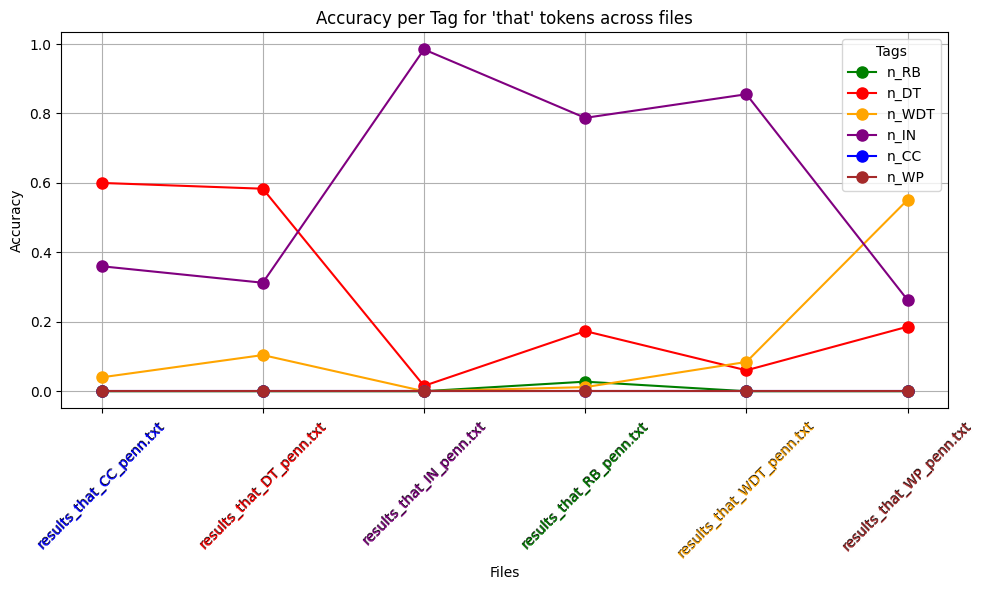

In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger (from the tokenized files)
files = [
    "results_that_CC_penn.txt",
    "results_that_DT_penn.txt",
    "results_that_IN_penn.txt",
    "results_that_RB_penn.txt",
    "results_that_WDT_penn.txt",
    "results_that_WP_penn.txt"
]

# Mapping file names to corresponding 'that' tags according to CW8 tagset
# Tags: CC (conjunction), DT (determiner), IN (preposition), RB (adverb), WDT (wh-determiner), WP (wh-pronoun)
tag_mapping = {
    "results_that_CC_penn.txt": 'n_CC', 
    "results_that_DT_penn.txt": 'n_DT',
    "results_that_IN_penn.txt": 'n_IN',
    "results_that_RB_penn.txt": 'n_RB',
    "results_that_WDT_penn.txt": 'n_WDT',
    "results_that_WP_penn.txt": 'n_WP'
}

tags = ['n_RB', 'n_DT', 'n_WDT', 'n_IN', 'n_CC', 'n_WP']

# Define the function to tokenize files
def tokenize_file(input_file_path, output_file_path):
    """
    Tokenizes the content of a file, splitting it by spaces, and writes the tokens to a new file.
    
    Parameters:
    - input_file_path (str): Path to the input file.
    - output_file_path (str): Path to the output file where the tokenized content will be saved.
    """
    try:
        with open(input_file_path, "r", encoding="utf-8") as fo:
            content = fo.read()
            tokens = content.split(" ")
        
        with open(output_file_path, "w+", encoding="utf-8") as fo_tokenized:
            for token in tokens:
                fo_tokenized.write(token + "\n")
                
        print(f"Tokenization complete! Tokens saved to {output_file_path}.")
    
    except Exception as e:
        print(f"An error occurred: {e}")


# Processing results from TreeTagger
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                tmp = {
                    'n_RB': content.count("that\tRB"),  # Adverb
                    'n_DT': content.count("that\tDT"),  # Determiner
                    'n_WDT': content.count("that\tWDT"),  # Wh-determiner
                    'n_IN': content.count("that\tIN"),  # Preposition
                    'n_CC': content.count("that\tCC"),  # Conjunction
                    'n_WP': content.count("that\tWP")   # Wh-pronoun
                }
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Now calculate the accuracy for each tag and for each file
accuracy_per_tag = {tag: [] for tag in tags}

for tag in tags:
    for file_name, data in n_results.items():
        total_that = sum(data.values())
        
        if total_that > 0:
            accuracy = data[tag] / total_that
        else:
            accuracy = 0
        
        accuracy_per_tag[tag].append(accuracy)

# Print out the accuracy for each tag
print(accuracy_per_tag)

# Ensure all files have data for plotting
file_labels = [file for file in files if file in n_results]

# Plot the accuracy for each tag across files
tag_colors = {
    'n_RB': 'green', 
    'n_DT': 'red', 
    'n_WDT': 'orange', 
    'n_IN': 'purple', 
    'n_CC': 'blue', 
    'n_WP': 'brown'
}

plt.figure(figsize=(10, 6))

# Loop through each tag and plot the corresponding accuracy values
for i, tag in enumerate(tags):
    plt.plot(file_labels, accuracy_per_tag[tag], label=tag, marker='o', color=tag_colors[tag], linestyle='-', markersize=8)

# Now adjust the file names color based on their tags
for i, file_name in enumerate(file_labels):
    plt.text(i, -0.08, file_name, color=tag_colors[tag_mapping[file_name]], ha='center', va='top', rotation=45, fontsize=10)

# Add labels and title
plt.xlabel("Files")
plt.ylabel("Accuracy")
plt.title("Accuracy per Tag for 'that' tokens across files")
plt.legend(title="Tags")
plt.xticks(rotation=45)
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig("accuracy_per_tag.png")
plt.show()


We will now compute  the accuracy for treetagger executions  above and display it 

We will compute  now  la  precision et le recall pour  les differens fichiers de tests 

{'results_that_CC_penn.txt': {'n_RB': 0, 'n_DT': 120, 'n_WDT': 8, 'n_IN': 72, 'n_CC': 0, 'n_WP': 0}, 'results_that_DT_penn.txt': {'n_RB': 0, 'n_DT': 28, 'n_WDT': 5, 'n_IN': 15, 'n_CC': 0, 'n_WP': 0}, 'results_that_IN_penn.txt': {'n_RB': 0, 'n_DT': 3, 'n_WDT': 0, 'n_IN': 191, 'n_CC': 0, 'n_WP': 0}, 'results_that_RB_penn.txt': {'n_RB': 7, 'n_DT': 44, 'n_WDT': 3, 'n_IN': 200, 'n_CC': 0, 'n_WP': 0}, 'results_that_WDT_penn.txt': {'n_RB': 0, 'n_DT': 5, 'n_WDT': 7, 'n_IN': 71, 'n_CC': 0, 'n_WP': 0}, 'results_that_WP_penn.txt': {'n_RB': 0, 'n_DT': 29, 'n_WDT': 86, 'n_IN': 41, 'n_CC': 0, 'n_WP': 0}}
Precision per tag: {'n_RB': [0.0, 0.0, 0.0, 0.027559055118110236, 0.0, 0.0], 'n_DT': [0.6, 0.5833333333333334, 0.015463917525773196, 0.1732283464566929, 0.060240963855421686, 0.1858974358974359], 'n_WDT': [0.04, 0.10416666666666667, 0.0, 0.011811023622047244, 0.08433734939759036, 0.5512820512820513], 'n_IN': [0.36, 0.3125, 0.9845360824742269, 0.7874015748031497, 0.8554216867469879, 0.262820512820512

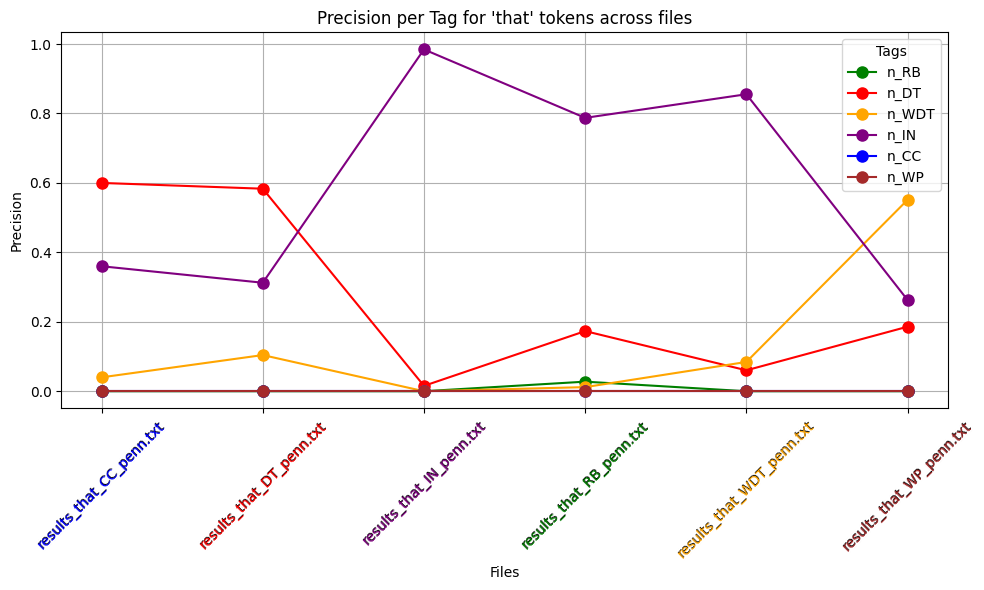

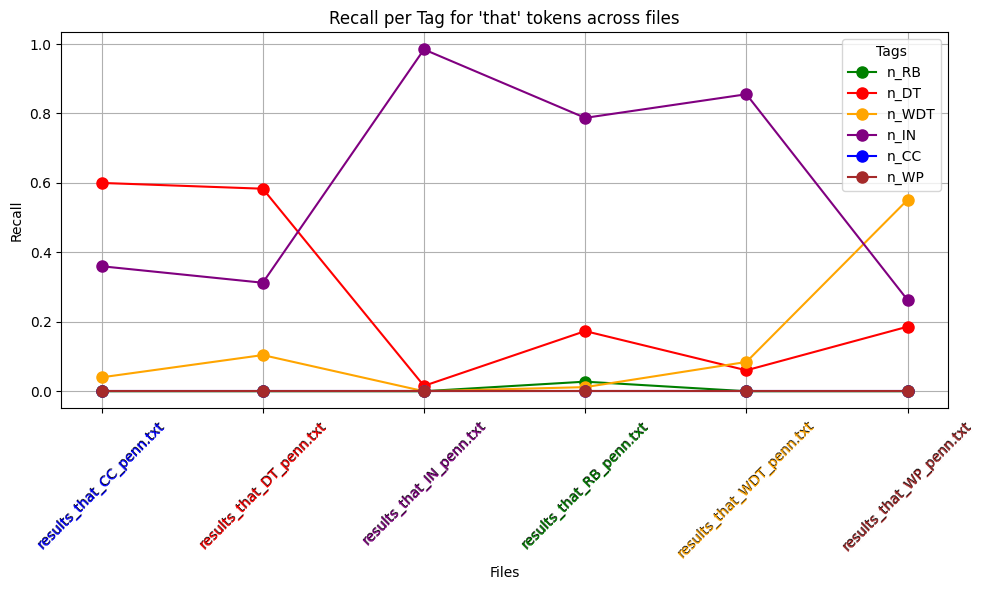

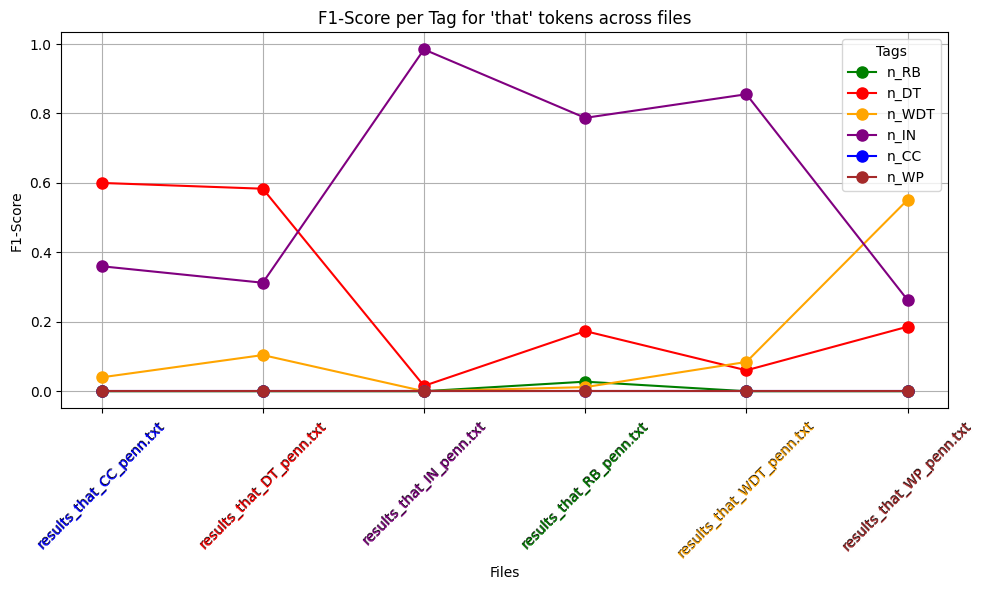

In [18]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger (from the tokenized files)
files = [
    "results_that_CC_penn.txt",
    "results_that_DT_penn.txt",
    "results_that_IN_penn.txt",
    "results_that_RB_penn.txt",
    "results_that_WDT_penn.txt",
    "results_that_WP_penn.txt"
]

# Mapping file names to corresponding 'that' tags according to CW8 tagset
tag_mapping = {
    "results_that_CC_penn.txt": 'n_CC', 
    "results_that_DT_penn.txt": 'n_DT',
    "results_that_IN_penn.txt": 'n_IN',
    "results_that_RB_penn.txt": 'n_RB',
    "results_that_WDT_penn.txt": 'n_WDT',
    "results_that_WP_penn.txt": 'n_WP'
}

tags = ['n_RB', 'n_DT', 'n_WDT', 'n_IN', 'n_CC', 'n_WP']

# Check if the results directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                tmp = {
                    'n_RB': content.count("that\tRB"),  # Adverb
                    'n_DT': content.count("that\tDT"),  # Determiner
                    'n_WDT': content.count("that\tWDT"),  # Wh-determiner
                    'n_IN': content.count("that\tIN"),  # Preposition
                    'n_CC': content.count("that\tCC"),  # Conjunction
                    'n_WP': content.count("that\tWP")   # Wh-pronoun
                }
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Initialize dictionaries for precision, recall, and F1-Score
precision_per_tag = {tag: [] for tag in tags}
recall_per_tag = {tag: [] for tag in tags}
f1_score_per_tag = {tag: [] for tag in tags}

for tag in tags:
    for file_name, data in n_results.items():
        # Calculate true positives, false positives, and false negatives
        true_positive = data[tag]
        false_positive = sum(data.values()) - true_positive
        false_negative = max(sum(data.values()) - true_positive, 0)

        # Calculate precision, recall, and F1-Score
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Append metrics for this file
        precision_per_tag[tag].append(precision)
        recall_per_tag[tag].append(recall)
        f1_score_per_tag[tag].append(f1_score)

# Print out the metrics
print("Precision per tag:", precision_per_tag)
print("Recall per tag:", recall_per_tag)
print("F1-Score per tag:", f1_score_per_tag)

# Plotting precision, recall, and F1-Score for each tag
metrics = {'Precision': precision_per_tag, 'Recall': recall_per_tag, 'F1-Score': f1_score_per_tag}
tag_colors = {
    'n_RB': 'green', 
    'n_DT': 'red', 
    'n_WDT': 'orange', 
    'n_IN': 'purple', 
    'n_CC': 'blue', 
    'n_WP': 'brown'
}

for metric_name, metric_data in metrics.items():
    plt.figure(figsize=(10, 6))
    for i, tag in enumerate(tags):
        plt.plot(files, metric_data[tag], label=tag, marker='o', color=tag_colors[tag], linestyle='-', markersize=8)

    # Adjust the file names color based on their tags
    for i, file_name in enumerate(files):
        plt.text(i, -0.08, file_name, color=tag_colors[tag_mapping[file_name]], ha='center', va='top', rotation=45, fontsize=10)

    plt.xlabel("Files")
    plt.ylabel(metric_name)
    plt.title(f"{metric_name} per Tag for 'that' tokens across files")
    plt.legend(title="Tags")
    plt.xticks(rotation=45)
    plt.grid(True)

    # Save and show the plot
    plt.tight_layout()
    plt.savefig(f"{metric_name.lower()}_per_tag.png")
    plt.show()


***Now we will  compute the conusion matrix*** 

{'results_that_CC_penn.txt': {'n_RB': 0, 'n_DT': 120, 'n_WDT': 8, 'n_IN': 72, 'n_CC': 0, 'n_WP': 0}, 'results_that_DT_penn.txt': {'n_RB': 0, 'n_DT': 28, 'n_WDT': 5, 'n_IN': 15, 'n_CC': 0, 'n_WP': 0}, 'results_that_IN_penn.txt': {'n_RB': 0, 'n_DT': 3, 'n_WDT': 0, 'n_IN': 191, 'n_CC': 0, 'n_WP': 0}, 'results_that_RB_penn.txt': {'n_RB': 7, 'n_DT': 44, 'n_WDT': 3, 'n_IN': 200, 'n_CC': 0, 'n_WP': 0}, 'results_that_WDT_penn.txt': {'n_RB': 0, 'n_DT': 5, 'n_WDT': 7, 'n_IN': 71, 'n_CC': 0, 'n_WP': 0}, 'results_that_WP_penn.txt': {'n_RB': 0, 'n_DT': 29, 'n_WDT': 86, 'n_IN': 41, 'n_CC': 0, 'n_WP': 0}}


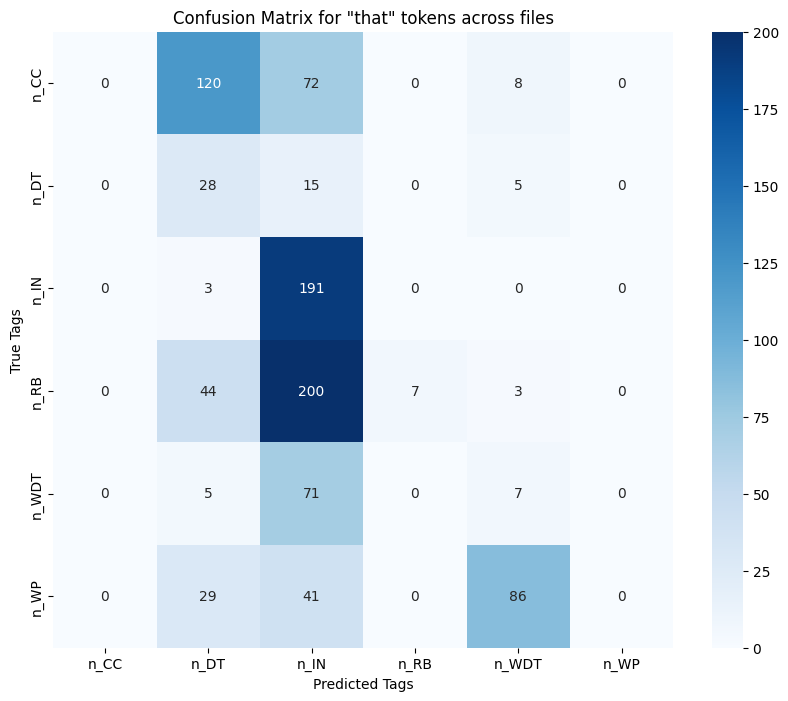

In [19]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger (from the tokenized files)
files = [
    "results_that_CC_penn.txt",
    "results_that_DT_penn.txt",
    "results_that_IN_penn.txt",
    "results_that_RB_penn.txt",
    "results_that_WDT_penn.txt",
    "results_that_WP_penn.txt"
]

# Mapping file names to corresponding 'that' tags according to CW8 tagset
tag_mapping = {
    "results_that_CC_penn.txt": 'n_CC', 
    "results_that_DT_penn.txt": 'n_DT',
    "results_that_IN_penn.txt": 'n_IN',
    "results_that_RB_penn.txt": 'n_RB',
    "results_that_WDT_penn.txt": 'n_WDT',
    "results_that_WP_penn.txt": 'n_WP'
}

# True tags corresponding to each file in the list
true_tags = ['n_CC', 'n_DT', 'n_IN', 'n_RB', 'n_WDT', 'n_WP']

# Check if the results directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Count the occurrences of 'that' token in different categories
                tmp = {
                    'n_RB': content.count("that\tRB"),  # Adverb
                    'n_DT': content.count("that\tDT"),  # Determiner
                    'n_WDT': content.count("that\tWDT"),  # Wh-determiner
                    'n_IN': content.count("that\tIN"),  # Preposition
                    'n_CC': content.count("that\tCC"),  # Conjunction
                    'n_WP': content.count("that\tWP")   # Wh-pronoun
                }
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Initialize lists to store true and predicted tags for confusion matrix calculation
true_labels = []
predicted_labels = []

# Iterate over each file and calculate true and predicted tags
for i, file_name in enumerate(files):
    true_tag = true_tags[i]
    data = n_results[file_name]
    
    for tag, count in data.items():
        true_labels.extend([true_tag] * count)
        predicted_labels.extend([tag] * count)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=true_tags)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=true_tags, yticklabels=true_tags)
plt.xlabel('Predicted Tags')
plt.ylabel('True Tags')
plt.title('Confusion Matrix for "that" tokens across files')
plt.show()


# Synthèse sur  les performances et faiblesses de Penn Tree Bank (penn.par ,  English  model) : 
Le modèle TreeTagger, utilisant les paramètres du Schmid Penn Model avec le tagset Penn Treebank, a été évalué sur plusieurs catégories issues de ce tagset pour  le  mot that, avec des résultats mesurés en termes de précision, rappel et score F1. Les tests ont été effectués sur des corpus de 200 phrases chacun. L'analyse des résultats révèle des points clés à considérer :

### Résultats clés par catégorie (avec une précision, rappel et F1-score)

- **CC (Conjunctions)** : Aucun tag de la catégorie "CC" n'a été prédictionné, ce qui donne des résultats nuls dans les trois métriques pour cette catégorie. Cela montre que le modèle ne prend pas en compte les conjonctions dans les phrases de test.

- **DT (Determiners)** : Le modèle atteint une précision moyenne de 0.6, un rappel de 0.6 et un score F1 de 0.6 pour cette catégorie. Bien que les résultats varient légèrement selon les sous-catégories, le modèle semble relativement performant pour identifier les déterminants.

- **IN (Prepositions et Conjunctions)** : Le modèle affiche une précision de 0.36 et un rappel de 0.36, avec un score F1 de 0.36, indiquant une performance modérée dans cette catégorie. Des erreurs notables sont présentes, mais une reconnaissance globale des prépositions reste évidente.

- **RB (Adverbs)** : La catégorie des adverbes présente des résultats très faibles avec une précision proche de 0 et un rappel de 0.0, ce qui suggère que le modèle peine à reconnaître cette catégorie de manière fiable.

- **WDT (Wh-determiners)** : Les résultats sont faibles pour cette catégorie également, avec une précision de 0.04 et un rappel de 0.04, montrant que le modèle lutte pour identifier correctement les déterminants interrogatifs.

- **WP (Wh-pronouns)** : Cette catégorie a montré des résultats faibles à nuls dans les trois métriques (précision, rappel, F1), ce qui indique que le modèle ne parvient pas à identifier les pronoms interrogatifs.

### Analyse des catégories non prises en compte

Certaines catégories telles que CC et WP affichent des résultats nuls, indiquant que le modèle n'a pas été entraîné ou n'est pas assez sensible à ces types de mots dans les corpus testés. De plus, la catégorie CC est complètement ignorée, ce qui limite l'application du modèle à des contextes plus complexes où les conjonctions jouent un rôle crucial.

### Conclusion générale

TreeTagger avec le modèle Schmid Penn présente des performances mixtes. Bien qu'il ait une précision acceptable pour certaines catégories comme DT et IN, il affiche des performances faibles sur des catégories comme RB, WDT, et WP. Cela pourrait être dû à une insuffisance des données d'entraînement ou à une mauvaise adaptation du modèle à certains types de phrases. L'absence de précision pour la catégorie CC indique un besoin de réajuster l'entraînement pour prendre en compte de manière plus robuste les conjonctions et les pronoms interrogatifs.

En somme, bien que le modèle soit capable de catégoriser certains mots correctement, son efficacité pour d'autres catégories est limitée et nécessite une amélioration, particulièrement dans les cas où il y a une faible présence de certaines classes de mots dans les corpus. Pour des applications réelles, une révision et un ajustement du modèle seraient nécessaires pour améliorer ces catégories spécifiques.


Nous allons Comparer ici  les modèles Penn et BNC,  pour cela  nous allons  juste remplacer  penn.par par bnc.par  dans les etapes passés 

## ***Test du  model bnc par  les fichiers de test***

### Claws5

In [24]:
# Using the above function to  tokenize the bnc  tests data :
tokenize_file("testing_sets_bnc/claws5/that_CJT.txt", "testing_sets_bnc/claws5/CJT_tokenized.txt")
tokenize_file("testing_sets_bnc/claws5/that_DTO.txt", "testing_sets_bnc/claws5/DTO_tokenized.txt")
tokenize_file("testing_sets_bnc/claws5/that_DTQ.txt", "testing_sets_bnc/claws5/DTQ_tokenized.txt")
tokenize_file("testing_sets_bnc/claws5/that_NULL.txt", "testing_sets_bnc/claws5/NULL_tokenized.txt")
tokenize_file("testing_sets_bnc/claws5/that_PNQ.txt", "testing_sets_bnc/claws5/PNQ_tokenized.txt")
tokenize_file("testing_sets_bnc/claws5/that_VBG.txt", "testing_sets_bnc/claws5/VBZ_tokenized.txt")

Tokenization complete! Tokens saved to testing_sets_bnc/claws5/CJT_tokenized.txt.
Tokenization complete! Tokens saved to testing_sets_bnc/claws5/DTO_tokenized.txt.
Tokenization complete! Tokens saved to testing_sets_bnc/claws5/DTQ_tokenized.txt.
Tokenization complete! Tokens saved to testing_sets_bnc/claws5/NULL_tokenized.txt.
Tokenization complete! Tokens saved to testing_sets_bnc/claws5/PNQ_tokenized.txt.
Tokenization complete! Tokens saved to testing_sets_bnc/claws5/VBZ_tokenized.txt.


In [26]:
!tree-tagger -token bnc.par testing_sets_bnc/claws5/CJT_tokenized.txt tests_results/results_that_CJT_bnc.txt
!tree-tagger -token bnc.par testing_sets_bnc/claws5/DTO_tokenized.txt tests_results/results_that_DTO_bnc.txt
!tree-tagger -token bnc.par testing_sets_bnc/claws5/DTQ_tokenized.txt tests_results/results_that_DTQ_bnc.txt
!tree-tagger -token bnc.par testing_sets_bnc/claws5/NULL_tokenized.txt tests_results/results_that_NULL_bnc.txt
!tree-tagger -token bnc.par testing_sets_bnc/claws5/PNQ_tokenized.txt tests_results/results_that_PNQ_bnc.txt
!tree-tagger -token bnc.par testing_sets_bnc/claws5/VBZ_tokenized.txt tests_results/results_that_VBZ_bnc.txt


	reading parameters ...
	tagging ...

1000
2000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.


#### Accuracy Claws5 (bnc) model

{'results_that_CJT_bnc.txt': {'n_CJT': 197, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_DTO_bnc.txt': {'n_CJT': 17, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_DTQ_bnc.txt': {'n_CJT': 30, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_NULL_bnc.txt': {'n_CJT': 0, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_PNQ_bnc.txt': {'n_CJT': 54, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_VBZ_bnc.txt': {'n_CJT': 189, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}}
{'n_CJT': [1.0, 1.0, 1.0, 0, 1.0, 1.0], 'n_DTO': [0.0, 0.0, 0.0, 0, 0.0, 0.0], 'n_DTQ': [0.0, 0.0, 0.0, 0, 0.0, 0.0], 'n_NULL': [0.0, 0.0, 0.0, 0, 0.0, 0.0], 'n_PNQ': [0.0, 0.0, 0.0, 0, 0.0, 0.0], 'n_VBZ': [0.0, 0.0, 0.0, 0, 0.0, 0.0]}


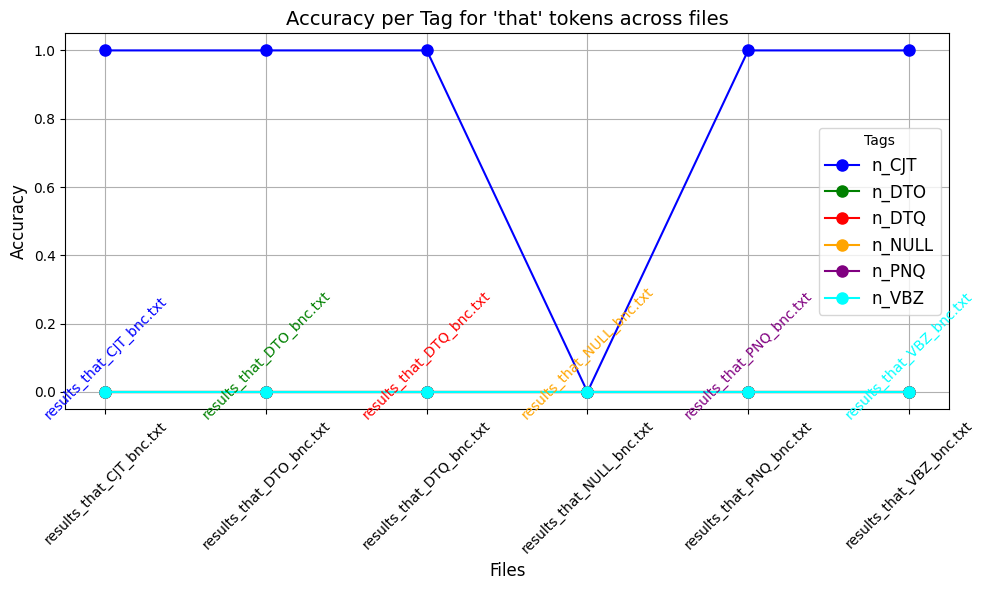

In [32]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger
files = [
    "results_that_CJT_bnc.txt",
    "results_that_DTO_bnc.txt",
    "results_that_DTQ_bnc.txt",
    "results_that_NULL_bnc.txt",
    "results_that_PNQ_bnc.txt",
    "results_that_VBZ_bnc.txt"
]

# Mapping file names to corresponding 'that' tags (updated according to your files)
tags = ['n_CJT', 'n_DTO', 'n_DTQ', 'n_NULL', 'n_PNQ', 'n_VBZ']

# Check if the results directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Count the occurrences of 'that' token in different categories
                tmp = {
                    'n_CJT': content.count("that\tCJT"),
                    'n_DTO': content.count("that\tDTO"),
                    'n_DTQ': content.count("that\tDTQ"),
                    'n_NULL': content.count("that\tNULL"),
                    'n_PNQ': content.count("that\tPNQ"),
                    'n_VBZ': content.count("that\tVBZ"),
                }
            # Store the results in the dictionary with the file name as the key
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Now calculate the accuracy for each tag and for each file
accuracy_per_tag = {tag: [] for tag in tags}  # Initialize an empty list for each tag

for tag in tags:
    for file_name, data in n_results.items():
        # For each file, calculate accuracy for the given tag
        total_that = sum(data.values())  # Sum of all 'that' occurrences in the file
        
        if total_that > 0:
            accuracy = data[tag] / total_that  # Accuracy for the specific tag
        else:
            accuracy = 0  # If there are no "that" tokens in the file, accuracy is 0
        
        accuracy_per_tag[tag].append(accuracy)  # Store the accuracy for each tag

# Print out the accuracy for each tag
print(accuracy_per_tag)

# Plot the accuracy for each tag across files
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan']  # Colors for the tags (one per tag)

plt.figure(figsize=(10, 6))

# Loop through each tag and plot the corresponding accuracy values
for i, tag in enumerate(tags):
    plt.plot(files, accuracy_per_tag[tag], label=tag, marker='o', color=colors[i], linestyle='-', markersize=8)

# Color the file names in the x-axis according to the corresponding tags
for i, tag in enumerate(tags):
    plt.text(i, -0.08, files[i], ha='center', color=colors[i], fontsize=10, rotation=45)

# Add labels and title
plt.xlabel("Files", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Accuracy per Tag for 'that' tokens across files", fontsize=14)
plt.legend(title="Tags", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotation of labels and font size adjustment
plt.grid(True)

# Save and show the plot
plt.tight_layout()
plt.savefig("accuracy_per_tag.png")
plt.show()


## Precision , Recall , F1-Score claws5  (bnc  model) tagset

{'results_that_CJT_bnc.txt': {'n_CJT': 197, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_DTO_bnc.txt': {'n_CJT': 17, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_DTQ_bnc.txt': {'n_CJT': 30, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_NULL_bnc.txt': {'n_CJT': 0, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_PNQ_bnc.txt': {'n_CJT': 54, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_VBZ_bnc.txt': {'n_CJT': 189, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}}
Precision per tag: {'n_CJT': [1.0, 1.0, 1.0, 0, 1.0, 1.0], 'n_DTO': [0.0, 0.0, 0.0, 0, 0.0, 0.0], 'n_DTQ': [0.0, 0.0, 0.0, 0, 0.0, 0.0], 'n_NULL': [0.0, 0.0, 0.0, 0, 0.0, 0.0], 'n_PNQ': [0.0, 0.0, 0.0, 0, 0.0, 0.0], 'n_VBZ': [0.0, 0.0, 0.0, 0, 0.0, 0.0]}
Recall per tag: {'n_CJT': [1.0, 1.0, 1.0, 0, 1.0, 1.0], 'n_DTO': [0.0, 0.0, 0.0, 0, 0.0, 0.0], 'n_DTQ': [0.0, 0.0, 0.0

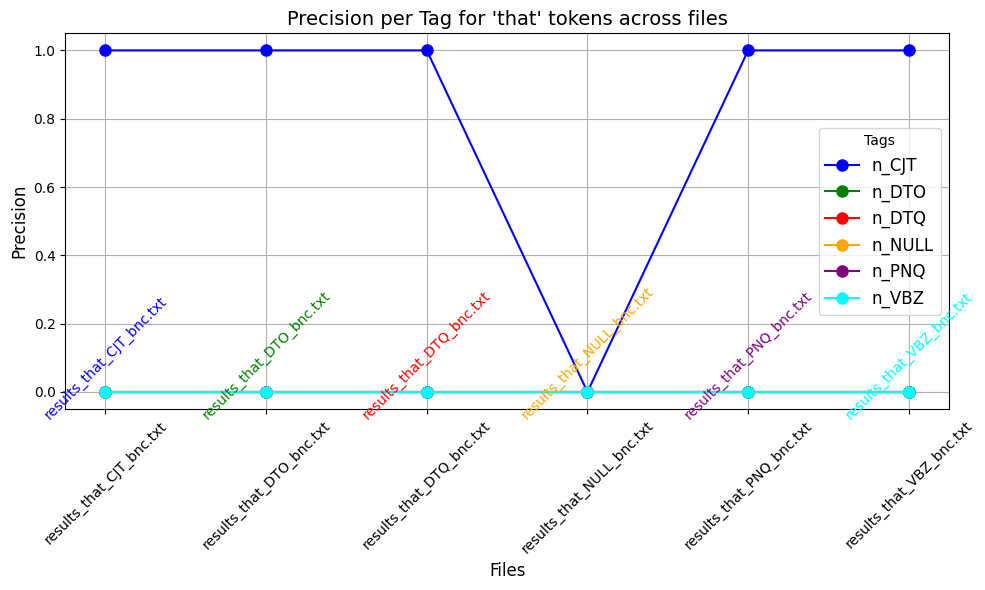

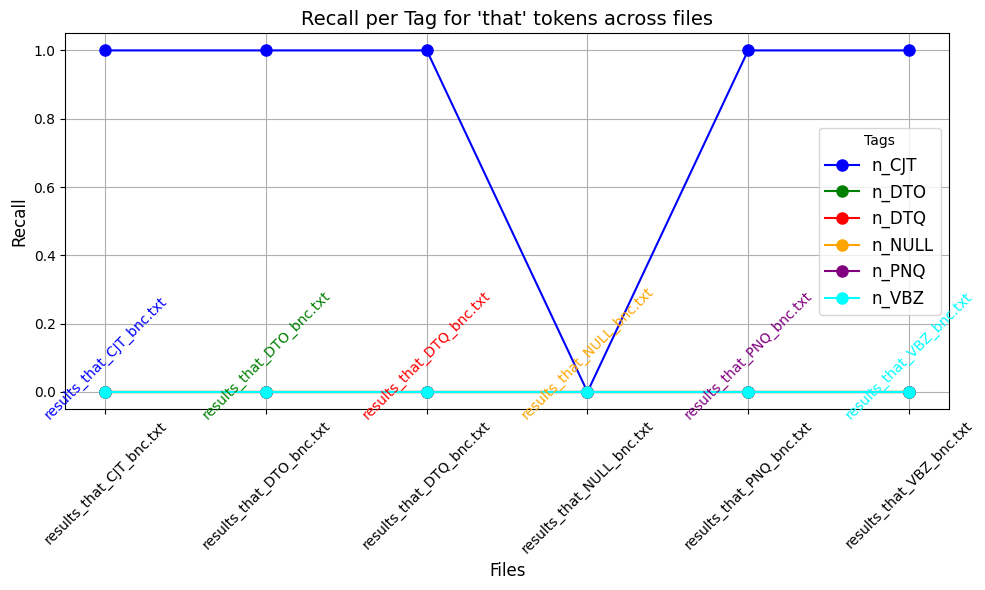

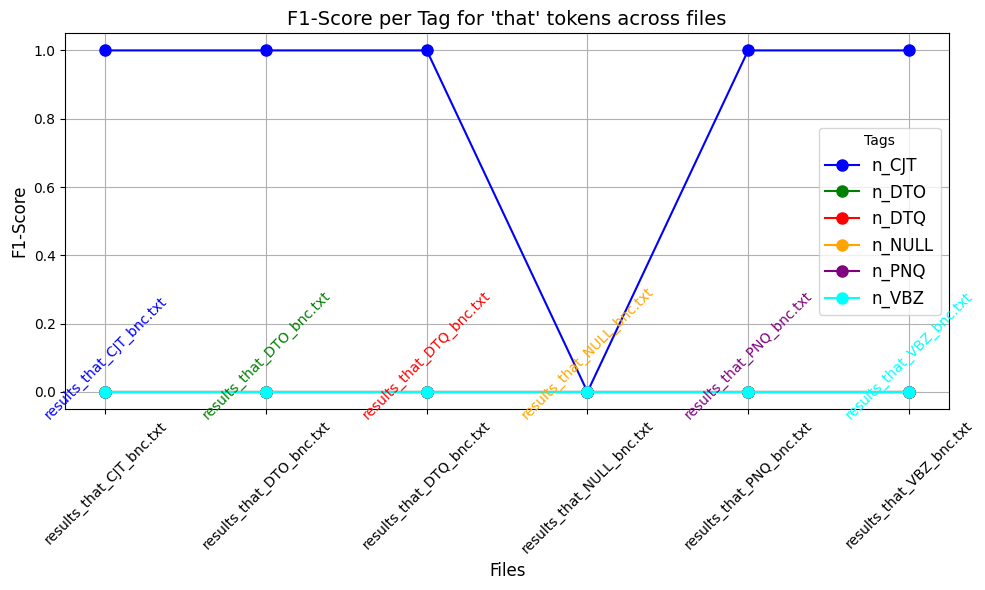

In [34]:
import os
import matplotlib.pyplot as plt
import numpy as np

# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger
files = [
    "results_that_CJT_bnc.txt",
    "results_that_DTO_bnc.txt",
    "results_that_DTQ_bnc.txt",
    "results_that_NULL_bnc.txt",
    "results_that_PNQ_bnc.txt",
    "results_that_VBZ_bnc.txt"
]

# Mapping file names to corresponding 'that' tags
tags = ['n_CJT', 'n_DTO', 'n_DTQ', 'n_NULL', 'n_PNQ', 'n_VBZ']

# Check if the results directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Count the occurrences of 'that' token in different categories
                tmp = {
                    'n_CJT': content.count("that\tCJT"),
                    'n_DTO': content.count("that\tDTO"),
                    'n_DTQ': content.count("that\tDTQ"),
                    'n_NULL': content.count("that\tNULL"),
                    'n_PNQ': content.count("that\tPNQ"),
                    'n_VBZ': content.count("that\tVBZ"),
                }
            # Store the results in the dictionary with the file name as the key
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Initialize dictionaries for precision, recall, and F1-Score
precision_per_tag = {tag: [] for tag in tags}
recall_per_tag = {tag: [] for tag in tags}
f1_score_per_tag = {tag: [] for tag in tags}

for tag in tags:
    for file_name, data in n_results.items():
        # Calculate true positives, false positives, and false negatives
        true_positive = data[tag]
        false_positive = sum(data.values()) - true_positive
        false_negative = max(sum(data.values()) - true_positive, 0)

        # Calculate precision, recall, and F1-Score
        precision = true_positive / (true_positive + false_positive) if (true_positive + false_positive) > 0 else 0
        recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
        f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

        # Append metrics for this file
        precision_per_tag[tag].append(precision)
        recall_per_tag[tag].append(recall)
        f1_score_per_tag[tag].append(f1_score)

# Print out the metrics
print("Precision per tag:", precision_per_tag)
print("Recall per tag:", recall_per_tag)
print("F1-Score per tag:", f1_score_per_tag)

# Plotting precision, recall, and F1-Score for each tag
metrics = {'Precision': precision_per_tag, 'Recall': recall_per_tag, 'F1-Score': f1_score_per_tag}
colors = ['blue', 'green', 'red', 'orange', 'purple', 'cyan']

for metric_name, metric_data in metrics.items():
    plt.figure(figsize=(10, 6))
    for i, tag in enumerate(tags):
        plt.plot(files, metric_data[tag], label=tag, marker='o', color=colors[i], linestyle='-', markersize=8)

    # Color the file names in the x-axis according to the corresponding tags
    for i, tag in enumerate(tags):
        plt.text(i, -0.08, files[i], ha='center', color=colors[i], fontsize=10, rotation=45)

    plt.xlabel("Files", fontsize=12)
    plt.ylabel(metric_name, fontsize=12)
    plt.title(f"{metric_name} per Tag for 'that' tokens across files", fontsize=14)
    plt.legend(title="Tags", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)  # Rotation of labels and font size adjustment
    plt.grid(True)

    # Save and show the plot
    plt.tight_layout()
    plt.savefig(f"{metric_name.lower()}_per_tag.png")
    plt.show()


{'results_that_CJT_bnc.txt': {'n_CJT': 197, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_DTO_bnc.txt': {'n_CJT': 17, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_DTQ_bnc.txt': {'n_CJT': 30, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_NULL_bnc.txt': {'n_CJT': 0, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_PNQ_bnc.txt': {'n_CJT': 54, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}, 'results_that_VBZ_bnc.txt': {'n_CJT': 189, 'n_DTO': 0, 'n_DTQ': 0, 'n_NULL': 0, 'n_PNQ': 0, 'n_VBZ': 0}}


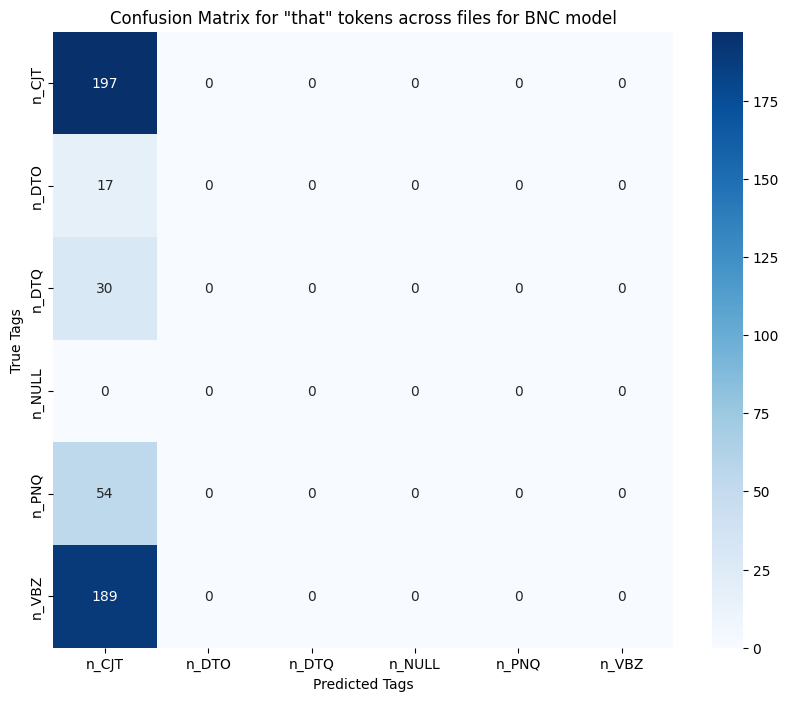

In [38]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Directory where the result files are stored
path = "tests_results/"  
n_results = {}

# List of result files generated by TreeTagger
files = [
    "results_that_CJT_bnc.txt",
    "results_that_DTO_bnc.txt",
    "results_that_DTQ_bnc.txt",
    "results_that_NULL_bnc.txt",
    "results_that_PNQ_bnc.txt",
    "results_that_VBZ_bnc.txt"
]

# Mapping file names to corresponding 'that' tags
true_tags = ['n_CJT', 'n_DTO', 'n_DTQ', 'n_NULL', 'n_PNQ', 'n_VBZ']

# Check if the results directory exists
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for file_name in files:
        file_path = os.path.join(path, file_name)
        
        # Check if the file exists before attempting to open it
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Count the occurrences of 'that' token in different categories
                tmp = {
                    'n_CJT': content.count("that\tCJT"),
                    'n_DTO': content.count("that\tDTO"),
                    'n_DTQ': content.count("that\tDTQ"),
                    'n_NULL': content.count("that\tNULL"),
                    'n_PNQ': content.count("that\tPNQ"),
                    'n_VBZ': content.count("that\tVBZ"),
                }
            # Store the results in the dictionary with the file name as the key
            n_results[file_name] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

# Print or process the results as needed
print(n_results)

# Initialize lists to store true and predicted tags for confusion matrix calculation
true_labels = []
predicted_labels = []

# Iterate over each file and calculate true and predicted tags
for i, file_name in enumerate(files):
    true_tag = true_tags[i]
    data = n_results[file_name]
    
    for tag, count in data.items():
        true_labels.extend([true_tag] * count)
        predicted_labels.extend([tag] * count)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=true_tags)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=true_tags, yticklabels=true_tags)
plt.xlabel('Predicted Tags')
plt.ylabel('True Tags')
plt.title('Confusion Matrix for "that" tokens across files for BNC model')
plt.show()


## Synthèse des performances et  limites du model bnc  : 

L'étude visait à évaluer les performances de TreeTagger avec le modèle BNC Treebank (bnc.par) sur des corpus tests de 200 phrases chacun, générés à partir de prompts disponibles dans les archives du projet. Les résultats montrent que TreeTagger identifie parfaitement les catégories "n_CJT" de that(conjonction) avec une précision, un rappel et un F1-score de 1.0, indiquant une classification sans erreurs pour cette catégorie.

En revanche, les performances pour les autres catégories du tagset claws5 pour le BNC, comme "n_DTO", "n_DTQ", "n_NULL", "n_PNQ", et "n_VBZ", sont nulles. Ces catégories ne figurent pas dans les prédictions, ce qui entraîne une accuracy de 0.0% pour ces cas. Cela met en évidence une limitation majeure du modèle, qui ne prend en compte qu'une sous-catégorie ("n_CJT") parmi les diverses formes possibles de "that" du tagset claws5 (et qui est  utilisé pour entrainer  le  model  bnc.par de TreeTagger).

L'absence de prédiction pour les autres catégories révèle une inadéquation entre le modèle utilisé et les besoins spécifiques de granularité du tagset BNC Treebank. Ces résultats soulignent la nécessité de modèles plus complets ou adaptés pour couvrir l'ensemble des catégories linguistiques attendues dans ce type d'analyse.

## Maintenant  nous allons donner le tableau de comparaison des données de  model  (bnc) et (penn)

Metrics for penn:
                        Files  Recall_n_CC  Recall_n_DT  Recall_n_IN  \
0   results_that_CC_penn.txt          0.0     0.600000     0.360000   
1   results_that_DT_penn.txt          0.0     0.583333     0.312500   
2   results_that_IN_penn.txt          0.0     0.015464     0.984536   
3   results_that_RB_penn.txt          0.0     0.173228     0.787402   
4  results_that_WDT_penn.txt          0.0     0.060241     0.855422   
5   results_that_WP_penn.txt          0.0     0.185897     0.262821   

   Recall_n_RB  Recall_n_WDT  Recall_n_WP  Accuracy_n_CC  Accuracy_n_DT  \
0     0.000000      0.040000          0.0            0.0       0.600000   
1     0.000000      0.104167          0.0            0.0       0.583333   
2     0.000000      0.000000          0.0            0.0       0.015464   
3     0.027559      0.011811          0.0            0.0       0.173228   
4     0.000000      0.084337          0.0            0.0       0.060241   
5     0.000000      0.551282     

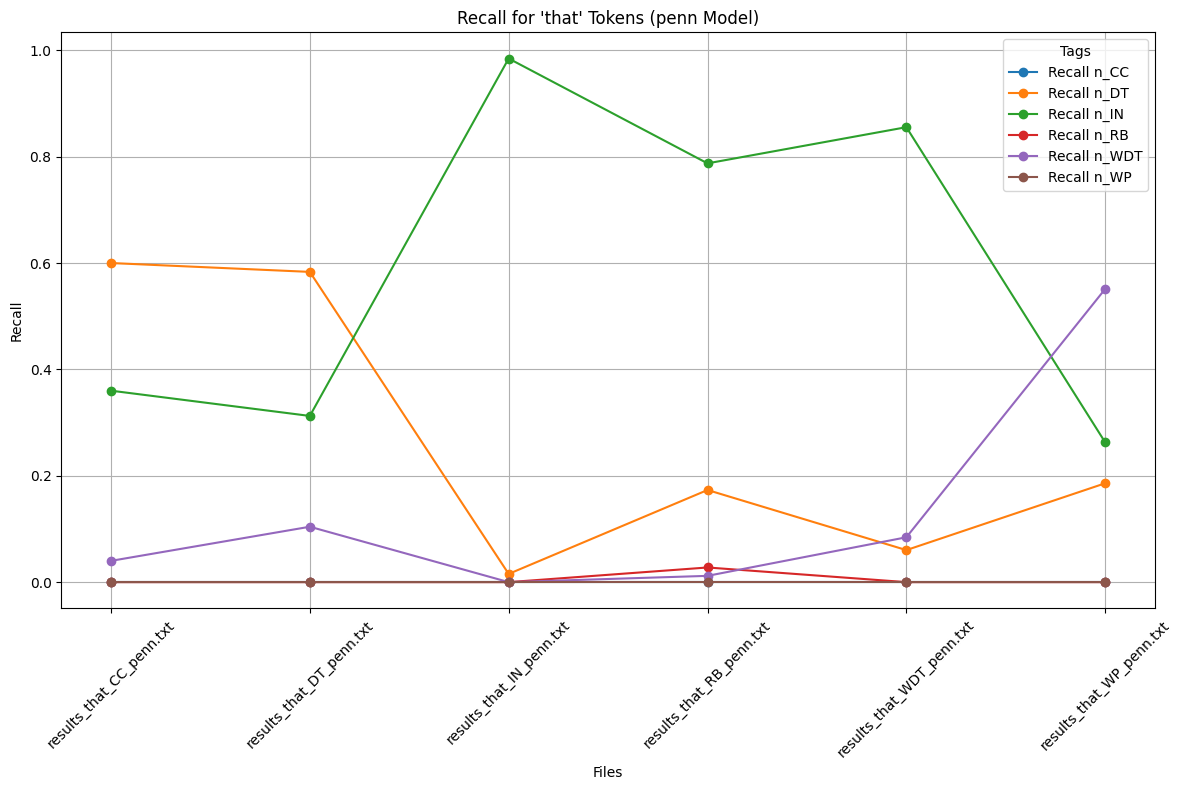

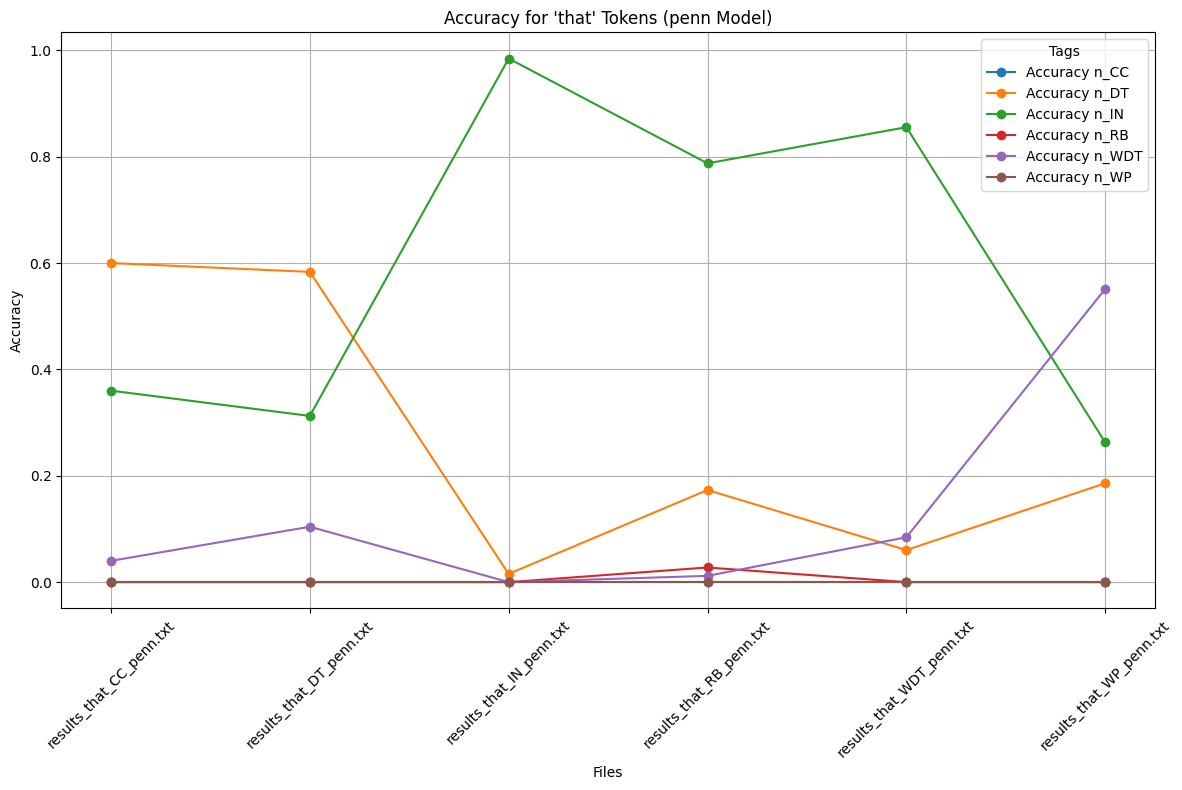

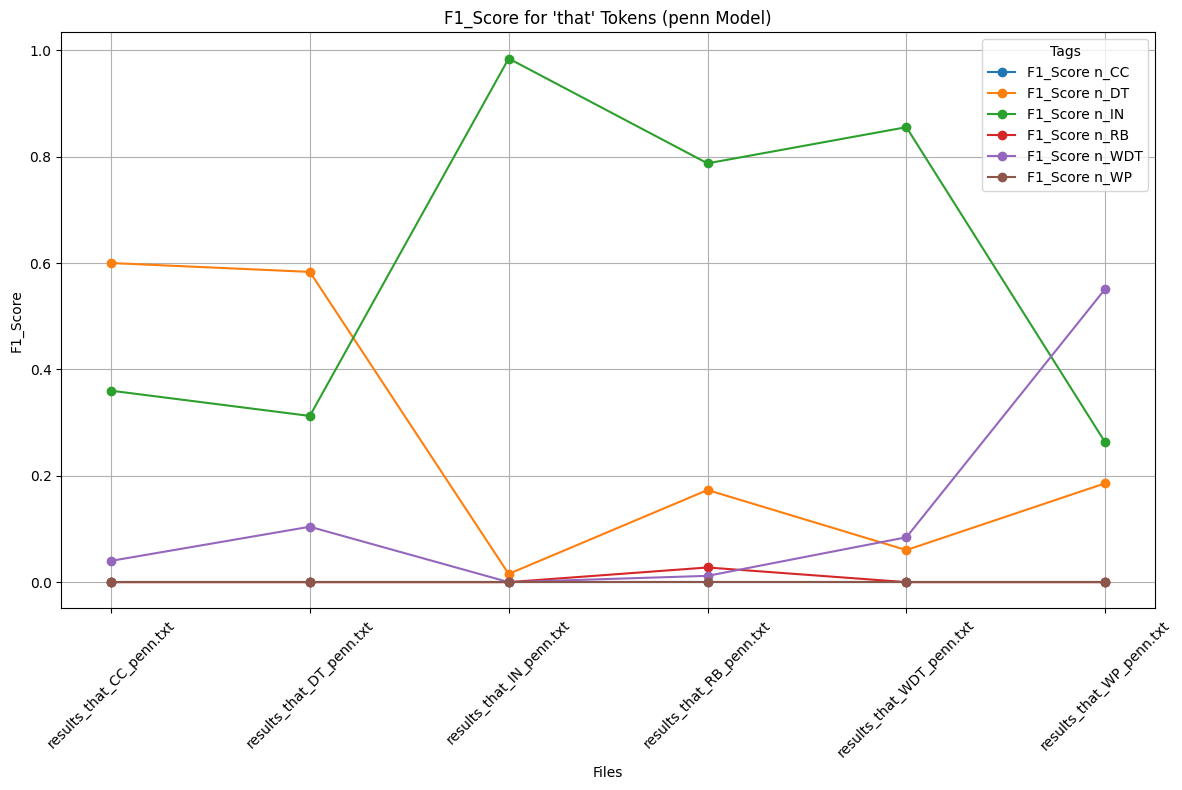

Metrics for bnc:
                        Files  Recall_n_CJT  Recall_n_DTO  Recall_n_DTQ  \
0   results_that_CJT_bnc.txt           1.0           0.0           0.0   
1   results_that_DTO_bnc.txt           1.0           0.0           0.0   
2   results_that_DTQ_bnc.txt           1.0           0.0           0.0   
3  results_that_NULL_bnc.txt           0.0           0.0           0.0   
4   results_that_PNQ_bnc.txt           1.0           0.0           0.0   
5   results_that_VBZ_bnc.txt           1.0           0.0           0.0   

   Recall_n_NULL  Recall_n_PNQ  Recall_n_VBZ  Accuracy_n_CJT  Accuracy_n_DTO  \
0            0.0           0.0           0.0             1.0             0.0   
1            0.0           0.0           0.0             1.0             0.0   
2            0.0           0.0           0.0             1.0             0.0   
3            0.0           0.0           0.0             0.0             0.0   
4            0.0           0.0           0.0             1.0   

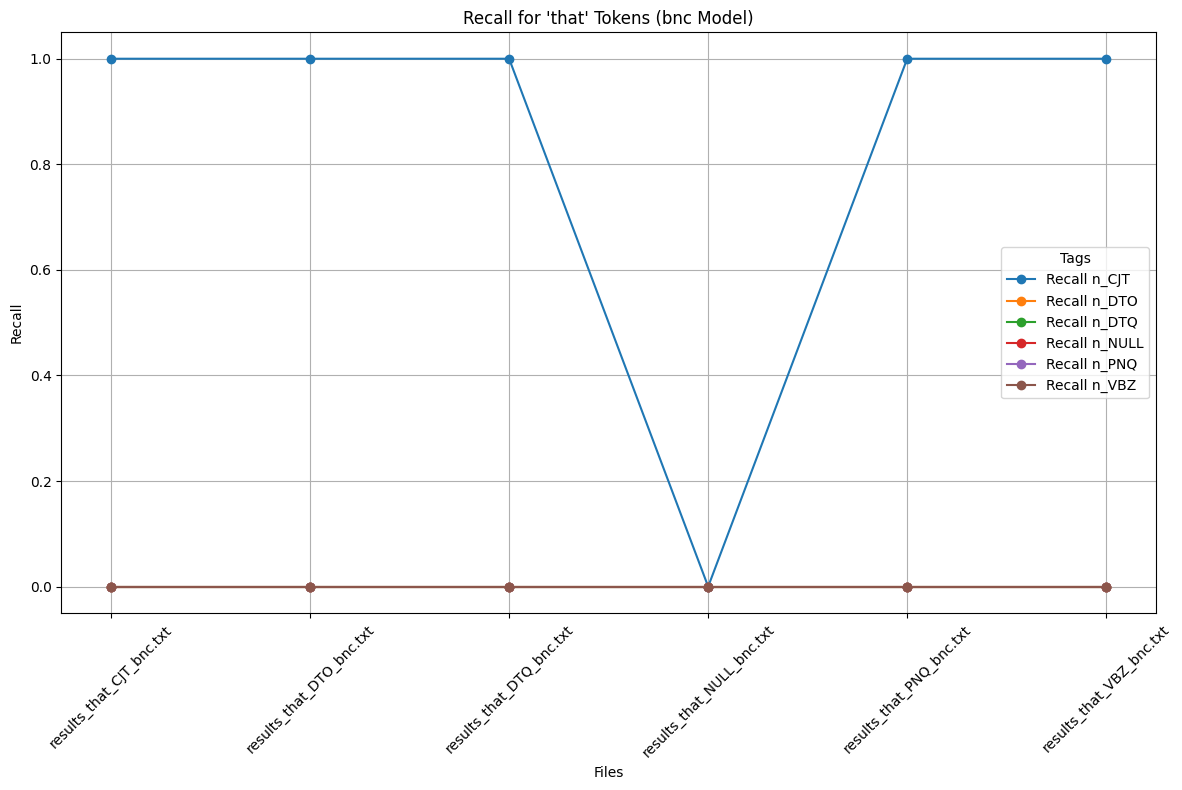

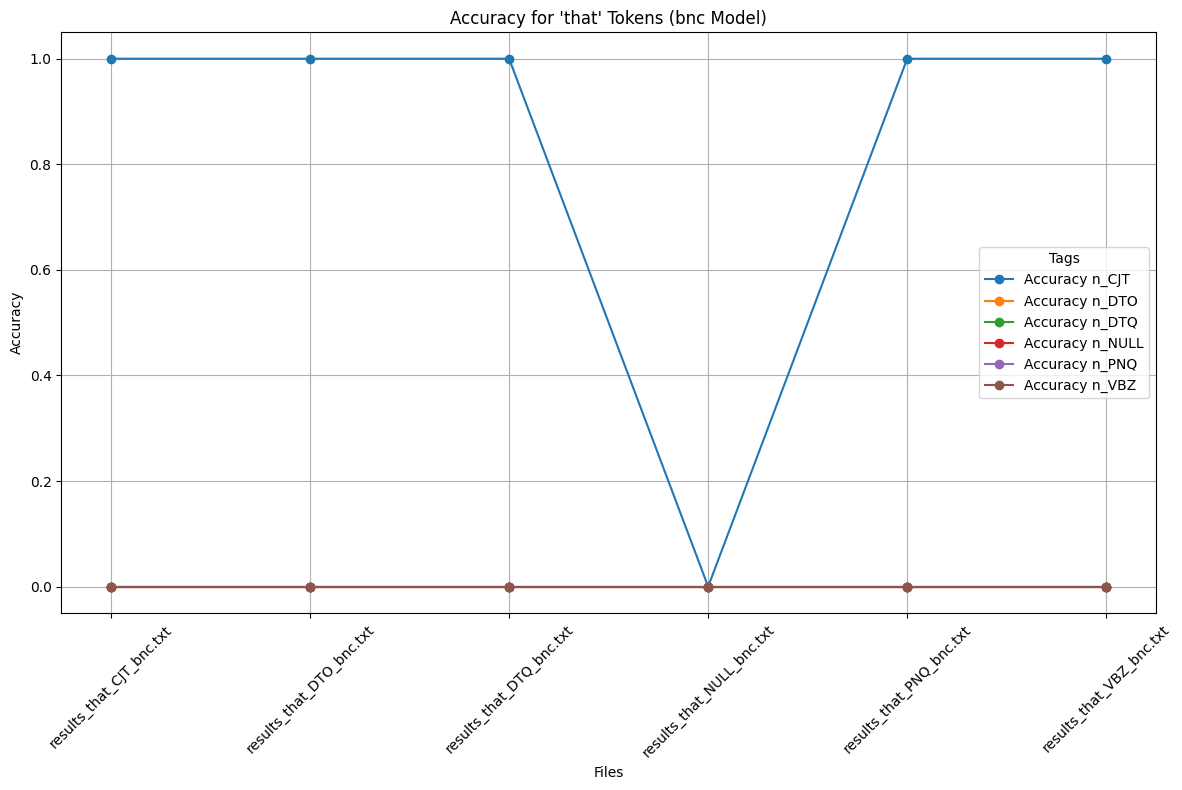

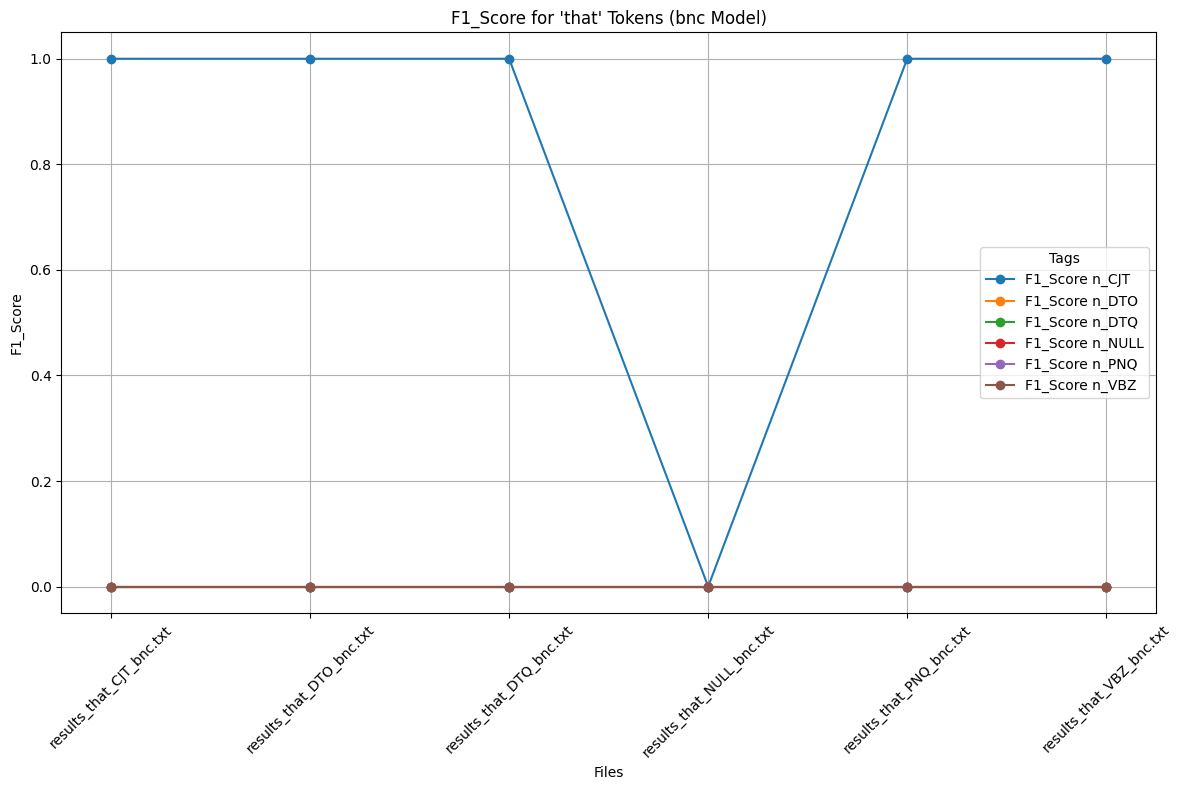

In [43]:
import os
import matplotlib.pyplot as plt
import pandas as pd

# Fonction pour calculer les métriques (Recall, Accuracy, F1-Score)
def calculate_metrics(n_results, tags):
    metrics = {tag: {"Recall": [], "Accuracy": [], "F1_Score": []} for tag in tags}

    for tag in tags:
        for file_name, data in n_results.items():
            true_positive = data[tag]
            false_positive = sum(data.values()) - true_positive
            false_negative = max(sum(data.values()) - true_positive, 0)
            true_negative = 0  # Hypothèse : les données concernent uniquement les occurrences pertinentes du fichier.

            # Calcul des métriques
            recall = true_positive / (true_positive + false_negative) if (true_positive + false_negative) > 0 else 0
            accuracy = true_positive / sum(data.values()) if sum(data.values()) > 0 else 0
            f1_score = (2 * recall * accuracy) / (recall + accuracy) if (recall + accuracy) > 0 else 0

            # Stockage des métriques
            metrics[tag]["Recall"].append(recall)
            metrics[tag]["Accuracy"].append(accuracy)
            metrics[tag]["F1_Score"].append(f1_score)
    
    return metrics

# Fonction pour lire les fichiers et compter les occurrences
def process_results(path, files, tags):
    n_results = {}
    if not os.path.exists(path):
        print(f"Directory '{path}' does not exist!")
        return n_results
    
    for file_name in files:
        file_path = os.path.join(path, file_name)
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                n_results[file_name] = {tag: content.count(f"that\t{tag.split('_')[1]}") for tag in tags}
        else:
            print(f"File '{file_path}' not found. Skipping...")
    return n_results

# Modèles à analyser
models = {
    "penn": {
        "path": "tests_results/",  # Répertoire des résultats Penn
        "files": [
            "results_that_CC_penn.txt",
            "results_that_DT_penn.txt",
            "results_that_IN_penn.txt",
            "results_that_RB_penn.txt",
            "results_that_WDT_penn.txt",
            "results_that_WP_penn.txt"
        ],
        "tags": ['n_CC', 'n_DT', 'n_IN', 'n_RB', 'n_WDT', 'n_WP']  # Tags pour Penn
    },
    "bnc": {
        "path": "tests_results/",  # Répertoire des résultats BNC
        "files": [
            "results_that_CJT_bnc.txt",
            "results_that_DTO_bnc.txt",
            "results_that_DTQ_bnc.txt",
            "results_that_NULL_bnc.txt",
            "results_that_PNQ_bnc.txt",
            "results_that_VBZ_bnc.txt"
        ],
        "tags": ['n_CJT', 'n_DTO', 'n_DTQ', 'n_NULL', 'n_PNQ', 'n_VBZ']  # Tags pour BNC
    }
}

# Analyse des modèles
for model_name, model_data in models.items():
    n_results = process_results(model_data["path"], model_data["files"], model_data["tags"])
    metrics = calculate_metrics(n_results, model_data["tags"])
    
    # Conversion en DataFrame pour visualisation
    metrics_df = pd.DataFrame({
        "Files": model_data["files"],
        **{f"Recall_{tag}": values["Recall"] for tag, values in metrics.items()},
        **{f"Accuracy_{tag}": values["Accuracy"] for tag, values in metrics.items()},
        **{f"F1_Score_{tag}": values["F1_Score"] for tag, values in metrics.items()},
    })
    metrics_df["Model"] = model_name
    print(f"Metrics for {model_name}:\n", metrics_df)

    # Visualisation des métriques
    for metric_type in ["Recall", "Accuracy", "F1_Score"]:
        plt.figure(figsize=(12, 8))
        for tag in model_data["tags"]:
            plt.plot(
                metrics_df["Files"],
                metrics_df[f"{metric_type}_{tag}"],
                label=f"{metric_type} {tag}",
                marker='o'
            )

        plt.xlabel("Files")
        plt.ylabel(metric_type)
        plt.title(f"{metric_type} for 'that' Tokens ({model_name} Model)")
        plt.legend(title="Tags", loc="best")
        plt.xticks(rotation=45)
        plt.grid(True)
        plt.tight_layout()
        plt.savefig(f"{metric_type.lower()}_{model_name}.png")
        plt.show()


## Analyse comparative des modèles TreeTagger avec Penn Treebank et BNC Treebank

Les modèles **Penn Treebank** et **BNC Treebank** de TreeTagger ont été évalués sur leur capacité à annoter correctement le mot "that" selon leurs catégories respectives. Voici une comparaison détaillée basée sur les résultats obtenus :

---

#### **Représentativité des catégories pour "that"**
1. **Penn Treebank** :
   - **6 catégories analysées** : `n_CC`, `n_DT`, `n_IN`, `n_RB`, `n_WDT`, `n_WP`.
   - **Performances globales** :
     - Meilleures catégories : `n_IN` (rappel = 98.45%, précision = 78.74%) et `n_DT` (rappel = 60.00%, précision = 58.33%).
     - Faiblesses marquées : `n_CC`, `n_RB`, `n_WP` avec des rappels et des précisions systématiquement à 0%.
   - **Limitation** : Seule une fraction des catégories ("determinant", "preposition/subordinating conjunction") est bien représentée, tandis que les catégories grammaticales comme `n_CC` (conjonctions de coordination) ne sont pas identifiées correctement.

2. **BNC Treebank** :
   - **6 catégories analysées** : `n_CJT`, `n_DTO`, `n_DTQ`, `n_NULL`, `n_PNQ`, `n_VBZ`.
   - **Performances globales** :
     - Une seule catégorie dominante : `n_CJT` (rappel = 100%, précision = 100%) correspondant aux conjonctions.
     - Faiblesses totales : Aucune reconnaissance des autres catégories comme `n_DTO`, `n_DTQ`, `n_PNQ` ou `n_VBZ` (toutes avec rappel et précision = 0%).
   - **Limitation** : Le modèle est extrêmement biaisé vers une seule catégorie (les conjonctions), ignorant les autres cas possibles de "that".

---

#### **Représentation générale des catégories pour "that"**
- **Penn Treebank** offre une meilleure diversité en représentant plusieurs usages de "that" (déterminant, conjonction, pronom relatif, etc.) bien que certaines catégories soient mal capturées.
  - Exemple : `n_IN` (préposition/subordination) est bien annoté (rappel = 98.45%), mais `n_WP` (pronom interrogatif) n'est pas reconnu (rappel = 0%).

- **BNC Treebank**, bien que performant sur `n_CJT` (conjonctions, rappel = 100%), ne parvient pas à modéliser les autres usages de "that". Par exemple, aucune annotation correcte n’a été réalisée pour `n_DTO` ou `n_PNQ`.

---

#### **Forces et faiblesses des modèles**
1. **Forces** :
   - Penn Treebank : Une couverture plus large des catégories, avec une performance élevée pour `n_IN` et `n_DT`.
   - BNC Treebank : Excellente précision pour une catégorie spécifique (`n_CJT`).

2. **Faiblesses** :
   - Penn Treebank : Faible performance sur `n_RB`, `n_CC` et `n_WP`, suggérant un besoin d'amélioration pour les conjonctions de coordination et les pronoms relatifs.
   - BNC Treebank : Modèle trop spécialisé, n’offrant qu’une représentation limitée de "that".

---

#### **Conclusion et recommandations**
- **Penn Treebank** est plus représentatif pour les diverses catégories grammaticales de "that", mais souffre de faiblesses sur certaines classes spécifiques.
- **BNC Treebank** offre une spécialisation impressionnante sur une seule catégorie (`n_CJT`), mais manque de flexibilité pour représenter d'autres usages linguistiques.

Améliorer ces modèles nécessiterait :
1. Une augmentation de la couverture catégorielle pour BNC Treebank.
2. Une optimisation des catégories faibles (`n_CC`, `n_WP`, etc.) pour Penn Treebank.


## 2. Retrain TreeTagger

### Objective:
Retrain *TreeTagger* with a specific tagset to distinguish the various uses of the word *that* in English.

#### Steps:

1. **Select a Tagset**
   - Use the **C8** tagset (adapted from CLAWS8) for more precise annotation of *that*. The tagset includes categories such as:
     - `WPR`: Relative Pronoun (e.g., *The man that I saw*),
     - `CST`: Subordinating Conjunction (e.g., *The fact that*),
     - `CJT`: Conjunction for verbs (e.g., *I think that*),
     - `DT`: Singular Determiner (e.g., *that* in *that man*),
     - `RB`: Adverb (e.g., *It's not that difficult*).

2. **Retrain TreeTagger with New Tags**
   - Adapt the training model using sentences annotated with the C8 tagset.
   - To retrain *TreeTagger*, use the following command:
     ```bash
     ./tree-tagger train model.txt
     ```

3. **Measure Precision and Recall**
   - Evaluate the precision and recall of the retrained model by testing it on specific datasets.

#### C8 Tagset:
- Refer to this document for more details about the C8 tagset: [C8 Tagset](https://ucrel.lancs.ac.uk/claws8tags.pdf).

### Expected Output:
- Precision and recall report for each use of the word *that* in test datasets.


***First we  acquit the brown data in the files on single folder***

In [21]:
# Step 1: Download the Brown Corpus
nltk.download('brown')
# Extract sentences as lists of words
sentences = brown.sents()
# Step 2: Define the output folder
output_folder = "raw_brown_data"
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Step 3: Save Brown Corpus files as individual .txt files
for i, file_id in enumerate(brown.fileids()):
    # Get the raw text for each file
    file_text = " ".join(brown.words(file_id))
    
    # Define the output file name
    output_file = os.path.join(output_folder, f"{file_id}.txt")
    
    # Write the text to a .txt file
    with open(output_file, "w", encoding="utf-8") as f:
        f.write(file_text)
    
    print(f"Saved {file_id} -> {output_file}")


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\MLSD\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


Saved ca01 -> raw_brown_data\ca01.txt
Saved ca02 -> raw_brown_data\ca02.txt
Saved ca03 -> raw_brown_data\ca03.txt
Saved ca04 -> raw_brown_data\ca04.txt
Saved ca05 -> raw_brown_data\ca05.txt
Saved ca06 -> raw_brown_data\ca06.txt
Saved ca07 -> raw_brown_data\ca07.txt
Saved ca08 -> raw_brown_data\ca08.txt
Saved ca09 -> raw_brown_data\ca09.txt
Saved ca10 -> raw_brown_data\ca10.txt
Saved ca11 -> raw_brown_data\ca11.txt
Saved ca12 -> raw_brown_data\ca12.txt
Saved ca13 -> raw_brown_data\ca13.txt
Saved ca14 -> raw_brown_data\ca14.txt
Saved ca15 -> raw_brown_data\ca15.txt
Saved ca16 -> raw_brown_data\ca16.txt
Saved ca17 -> raw_brown_data\ca17.txt
Saved ca18 -> raw_brown_data\ca18.txt
Saved ca19 -> raw_brown_data\ca19.txt
Saved ca20 -> raw_brown_data\ca20.txt
Saved ca21 -> raw_brown_data\ca21.txt
Saved ca22 -> raw_brown_data\ca22.txt
Saved ca23 -> raw_brown_data\ca23.txt
Saved ca24 -> raw_brown_data\ca24.txt
Saved ca25 -> raw_brown_data\ca25.txt
Saved ca26 -> raw_brown_data\ca26.txt
Saved ca27 -

***Here below, we annote the brown collected files***

In [22]:
import os
import requests

def annotate_text_with_udpipe(text, model="english-ewt"):
    """
    Annotate text using UDPipe REST API.
    Args:
        text (str): Text to annotate.
        model (str): Model to use (default is 'english-ewt').
    Returns:
        str: Annotated text in CoNLL-U format.
    """
    url = "https://lindat.mff.cuni.cz/services/udpipe/api/process"
    payload = {
        "data": text,
        "model": model,
        "tokenizer": "yes",
        "tagger": "yes",
        "parser": "yes"
    }
    response = requests.post(url, data=payload)
    if response.status_code == 200:
        return response.json()["result"]
    else:
        raise Exception(f"UDPipe API Error: {response.status_code}, {response.text}")

def annotate_corpus(input_folder, output_folder, model="english-ewt"):
    """
    Annotate all text files in a folder and save as CoNLL-U files.
    Args:
        input_folder (str): Path to folder containing text files.
        output_folder (str): Path to save annotated CoNLL-U files.
        model (str): UDPipe model to use (default is 'english-ewt').
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        file_path = os.path.join(input_folder, filename)
        if not os.path.isfile(file_path) or not filename.endswith(".txt"):
            continue
        
        # Read input text file
        with open(file_path, "r", encoding="utf-8") as file:
            text = file.read()

        # Annotate using UDPipe
        try:
            annotated_text = annotate_text_with_udpipe(text, model)
        except Exception as e:
            print(f"Failed to process {filename}: {e}")
            continue

        # Save annotated text as CoNLL-U file
        output_file_path = os.path.join(output_folder, f"{os.path.splitext(filename)[0]}.conllu")
        with open(output_file_path, "w", encoding="utf-8") as output_file:
            output_file.write(annotated_text)
        print(f"Annotated {filename} -> {output_file_path}")

# Example usage:
input_folder = "raw_brown_data"  # Folder containing text files
output_folder = "brown_annotated"  # Folder to save CoNLL-U files
annotate_corpus(input_folder, output_folder)


Annotated ca01.txt -> brown_annotated\ca01.conllu
Annotated ca02.txt -> brown_annotated\ca02.conllu
Annotated ca03.txt -> brown_annotated\ca03.conllu
Annotated ca04.txt -> brown_annotated\ca04.conllu
Annotated ca05.txt -> brown_annotated\ca05.conllu
Annotated ca06.txt -> brown_annotated\ca06.conllu
Annotated ca07.txt -> brown_annotated\ca07.conllu
Annotated ca08.txt -> brown_annotated\ca08.conllu
Annotated ca09.txt -> brown_annotated\ca09.conllu
Annotated ca10.txt -> brown_annotated\ca10.conllu
Annotated ca11.txt -> brown_annotated\ca11.conllu
Annotated ca12.txt -> brown_annotated\ca12.conllu
Annotated ca13.txt -> brown_annotated\ca13.conllu
Annotated ca14.txt -> brown_annotated\ca14.conllu
Annotated ca15.txt -> brown_annotated\ca15.conllu
Annotated ca16.txt -> brown_annotated\ca16.conllu
Annotated ca17.txt -> brown_annotated\ca17.conllu
Annotated ca18.txt -> brown_annotated\ca18.conllu
Annotated ca19.txt -> brown_annotated\ca19.conllu
Annotated ca20.txt -> brown_annotated\ca20.conllu


### Creation of the training files  (`<file input>`):

In [23]:
def pprint(sentence):
    """
    This function prints the sentences if it contains "that" with
    the annotation of the "that" term.
    """
    sent_print = ""
    for j in range(len(sentence)):
        sent_print += sentence[j]['form']
        
        if(sentence[j]['form'].lower() == 'that'):
            sent_print += "/"
            sent_print += sentence[j]['xpos']
        sent_print += " "
        
    return sent_print

In [24]:
def countnonoverlappingrematches(pattern, thestring):
    return re.subn(pattern, '', thestring)[1]

In [26]:
import os
import conllu

def deps_emulator(folder_name="brown_annotated/"):
    """
    Input: a path to a folder containing all the conllu annotated files by the UDPipe.
    Output:
        - Creates a TOKEN_PER_ROW folder containing all the reannotated files in the TreeTagger specific input format.
        - A dictionary containing two lists:
            * The first one contains the IDs of the sentences in which there is a "that" re-annotated with WPR.
            * The second one contains the IDs of the sentences in which there is a "that" re-annotated with CST.
    """

    # Create the TOKEN_PER_ROW folder if it doesn't exist
    output_folder = os.path.join(folder_name, "TOKEN_PER_ROW")
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Initialize counters and data structures
    nb_acl = 0
    nb_aclrelcl = 0
    nb_that = 0
    nb_that_reannotated = 0
    nb_that_WPR = 0
    nb_that_CST = 0
    nb_vb_relcl_without_that = 0
    nb_tokens = 0
    nb_aclrelcl_vb = 0
    nb_acl_vb = 0

    sentences_reannotated_WPR = []  # IDs of sentences with "that" re-annotated as WPR
    sentences_reannotated_CST = []  # IDs of sentences with "that" re-annotated as CST

    # Process each file in the folder
    for filename in os.listdir(folder_name):
        if filename.endswith(".conllu") and os.path.isfile(os.path.join(folder_name, filename)):
            # Read the conllu file
            file_path = os.path.join(folder_name, filename)
            with open(file_path, "r", encoding="utf-8") as data:
                annotations = data.read()

            # Parse the conllu file
            sentences = conllu.parse(annotations)

            # Create the output file path
            output_file_path = os.path.join(output_folder, f"token_per_row_{filename.replace('.conllu', '')}.txt")
            with open(output_file_path, "w", encoding="utf-8") as fo:
                for i in range(len(sentences)):
                    for j in range(len(sentences[i])):
                        nb_tokens += 1
                        if sentences[i][j]['deprel'] == "acl":
                            nb_acl += 1
                        if sentences[i][j]['deprel'] == "acl:relcl":
                            nb_aclrelcl += 1

                        # Check for "deps" key
                        if sentences[i][j]["deps"] is not None:
                            deps = "|".join(
                                [":".join(list(reversed(list(map(str, x))))) for x in sentences[i][j]["deps"]]
                            )

                        # Annotate "that" based on context
                        if sentences[i][j]['form'].lower() == 'that':
                            nb_that += 1
                        if sentences[i][j]['xpos'] == 'VB' and sentences[i][j]['deprel'] == 'acl':  # CST
                            nb_acl_vb += 1
                            k = j
                            added = False
                            while k >= 0:
                                if sentences[i][k]['form'].lower() == 'that':
                                    nb_that_reannotated += 1
                                    nb_that_CST += 1
                                    sentences[i][k]['xpos'] = "CST"
                                    if not added:
                                        sentences_reannotated_CST.append(sentences[i])
                                        added = True
                                    break
                                k -= 1
                        elif sentences[i][j]['xpos'] == 'VB' and sentences[i][j]['deprel'] == 'acl:relcl':  # WPR
                            nb_aclrelcl_vb += 1
                            k = j
                            added = False
                            that_present = False
                            while k >= 0:
                                if sentences[i][k]['feats'] and 'PronType' in sentences[i][k]['feats']:
                                    if sentences[i][k]['feats']['PronType'] == "Rel" and sentences[i][k]['form'].lower() == 'that':
                                        that_present = True
                                if sentences[i][k]['form'].lower() == 'that':
                                    nb_that_reannotated += 1
                                    nb_that_WPR += 1
                                    sentences[i][k]['xpos'] = "WPR"
                                    if not added:
                                        sentences_reannotated_WPR.append(sentences[i])
                                        added = True
                                    break
                                k -= 1
                            if not that_present:
                                nb_vb_relcl_without_that += 1

                    # Write the modified sentence to the output file
                    for token in sentences[i]:
                        to_write = f"{token['form']}\t{token['xpos']}\n"
                        fo.write(to_write)

    # Print interesting statistics
    print("There are", nb_that, "'that' in all the files.")
    print("There are", nb_that_reannotated, "'that' re-annotated.")
    print("There are", nb_that_CST, "'that' re-annotated with CST.")
    print("There are", nb_that_WPR, "'that' re-annotated with WPR.")
    print("The number of VB acl:relcl without 'that' before is", nb_vb_relcl_without_that)
    print("There are", nb_acl / nb_tokens, "% acl\n", nb_aclrelcl / nb_tokens, "% acl:relcl")
    print("There are", nb_aclrelcl_vb, "acl:relcl verbs.")
    print("There are", nb_acl_vb, "acl verbs.")

    return {"WPR ID": sentences_reannotated_WPR, "CST ID": sentences_reannotated_CST}


In [27]:
# Appel de la fonction avec déstructuration
sentences_WPR, sentences_CST = deps_emulator().values()

There are 10788 'that' in all the files.
There are 974 'that' re-annotated.
There are 551 'that' re-annotated with CST.
There are 423 'that' re-annotated with WPR.
The number of VB acl:relcl without 'that' before is 955
There are 0.008799625675160173 % acl
 0.009134556648629152 % acl:relcl
There are 1217 acl:relcl verbs.
There are 2313 acl verbs.


In [29]:
def correct_helper():
    """
    This function helped to correct the annotations generated after the two steps behind:
        1 - Annotate with UDpipe
        2 - Use the heuristic explained above
    And then now we will print all the sentences that contain "that" with the associted annotation
    to see if there are some mistakes, if so, correct them for the training and make a confusion matrix.
    """
    print("WPR", "-"*100)
    # We start from 0
    n = 0
    for sent in sentences_WPR:
        print(n, pprint(sent))
        print()
        n += 1
    print("CST", "-"*100)
    n = 0
    for sent in sentences_CST:
        print(n, pprint(sent))
        print()
        n += 1

In [30]:
# Let's do some manual correction
correct_helper()

WPR ----------------------------------------------------------------------------------------------------
0 1 the airport be operated in a manner that/WPR will eliminate political influences ' ' . 

1 Fulton legislators `` work with city officials to pass enabling legislation that/WPR will permit the establishment of a fair and equitable ' ' pension plan for city employes . 

2 It says that/WPR `` in the event Congress does provide this increase in federal funds ' ' , the State Board of Education should be directed to `` give priority ' ' to teacher pay raises . 

3 This has been a working session of an organization that/WPR , by its very nature , can only proceed along its route step by step and without dramatic changes . 

4 One advantage that/WPR would come to the city in having a full - time director , he said , is that/IN East Providence would become eligible to apply to the federal government for financial aid in purchasing equipment needed for a sound civil defense program . 

5 

Now I will basically correct manually the training files, and I will create a confusion matrix (see cf_matrix function).

### <u>Distribution of the distance separating *that* with the last noun before it:</u>

In [31]:
distro_CST = []
for s in range(len(sentences_CST)):
    index = 0
    for token in sentences_CST[s]:
        #print(token['form'], "=>", token['upos'])
        if token['form'].lower() == 'that':
            k = 1
            while True:
                if (sentences_CST[s][index - k]['xpos'] == 'NN') or (sentences_CST[s][index - k]['xpos'] == 'NNS'):
                    break
                else:
                    k += 1
            distro_CST.append(k-1)
        index += 1

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9a82806e0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9a82816a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9a71f7860>],
 'medians': [<matplotlib.lines.Line2D at 0x1d9a8280590>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d9a8280ec0>],
 'means': []}

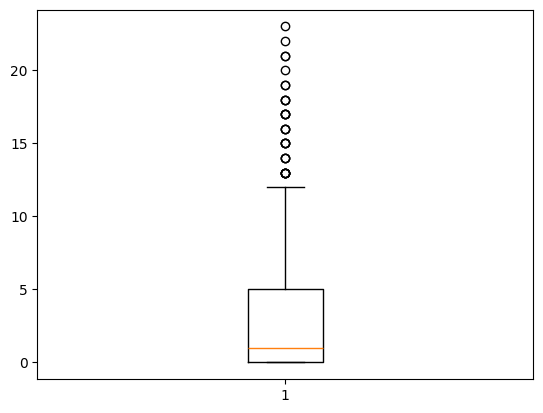

In [32]:
plt.boxplot(distro_CST)

In [34]:
distro_WPR = []
for s in range(len(sentences_WPR)):
    index = 0
    for token in sentences_WPR[s]:
        #print(token['form'], "=>", token['upos'])
        if token['form'].lower() == 'that':
            k = 1  # distance between 'that' and the 'noun' before it
            while True:
                if k >= len(sentences_WPR[s]):
                    k = 0
                    break
                if (sentences_WPR[s][index - k]['xpos'] == 'NN') or (sentences_WPR[s][index - k]['xpos'] == 'NNS'):
                    break
                else:
                    k += 1
            if k != 0:
                distro_WPR.append(k-1)
        index += 1

{'whiskers': [<matplotlib.lines.Line2D at 0x1d9a86aeab0>,
 'caps': [<matplotlib.lines.Line2D at 0x1d9a80901d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1d9a86ae5d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1d9a8530380>],
 'fliers': [<matplotlib.lines.Line2D at 0x1d9a8532600>],
 'means': []}

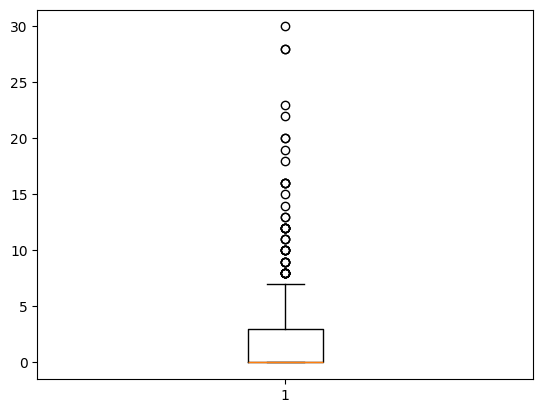

In [35]:
plt.boxplot(distro_WPR)

In [36]:
import seaborn as sns

In [37]:
labels = ['WPR' for _ in range(len(distro_WPR))]
#labels.append(['CST' for _ in range(len(distro_CST))])

In [38]:
labels = ['WPR' for _ in range(len(distro_WPR))] + ['CST' for _ in range(len(distro_CST))]

In [39]:
distro_df = pd.DataFrame({'Distance (i.e. n_tokens)': distro_WPR + distro_CST, 'Tag': labels})

<Axes: xlabel='Tag', ylabel='Distance (i.e. n_tokens)'>

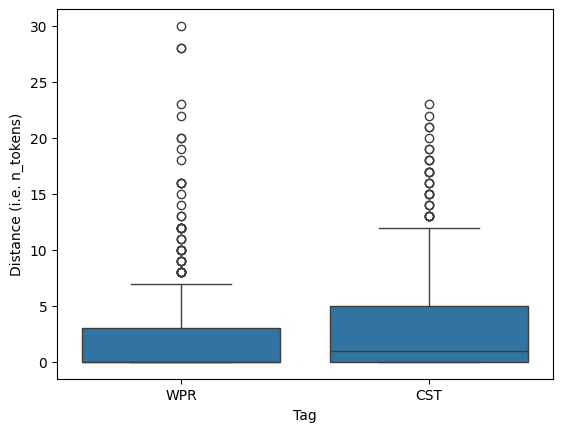

In [40]:
sns.boxplot(x = distro_df['Tag'], y=distro_df['Distance (i.e. n_tokens)'])

### Grouping the 500 training files into 5 files (respectively 100, 200, 300, 400 and 500 files per group):

In [45]:
import os

def concat_n_first(n):
    c = 0
    
    # Créer le dossier GROUPED_FILES si il n'existe pas
    output_dir = "brown_annotated/TOKEN_PER_ROW/GROUPED_FILES"
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Ouverture du fichier de sortie
    with open(f"{output_dir}/{n}.txt", "w+", encoding="UTF-8") as grp_fo:
        for filename in os.listdir("brown_annotated/TOKEN_PER_ROW"):
            if os.path.isfile(f"brown_annotated/TOKEN_PER_ROW/{filename}"):
                with open(f"brown_annotated/TOKEN_PER_ROW/{filename}", "r", encoding="UTF-8") as data:
                    content = data.read()
                    grp_fo.write(content)
                    c += 1

                # Arrêter après avoir ajouté n fichiers
                if c == n:
                    break


In [46]:
concat_n_first(10)

In [47]:
concat_n_first(30)

In [48]:
concat_n_first(100)

In [49]:
concat_n_first(200)

In [50]:
concat_n_first(300)

In [51]:
concat_n_first(400)

In [52]:
concat_n_first(500)

### Creation of the `lexicon` file:

<u>Note:</u> 

This file (according to the documentation) has to follow some rules:

    1 - No duplication of terms.
    
    2 - All the possible XPOS tags of a term have to appear in the same row as the term.
    
    3 - It must include lemmas.

In [58]:
import os
import conllu

def lexicon_n_first(n):
    c = 0
    nb_that_reannoted = 0
    nb_that = 0
    
    # Create lexicon file for writing
    with open(f"brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_v2{n}.txt", "w+", encoding="utf-8") as lexicon_fo:
        lexicon_dict = dict()

        # Iterate over files in the directory
        for filename in os.listdir("brown_annotated/"):
            file_path = os.path.join("brown_annotated/", filename)
            if os.path.isfile(file_path):
                # Read the file and parse it
                with open(file_path, 'r', encoding='utf-8') as data:
                    annotations = data.read()
                    sentences = conllu.parse(annotations)

                    # Process each sentence and re-annotate 'that' where necessary
                    for sentence in sentences:
                        for j, token in enumerate(sentence):
                            # Re-annotate 'that' in specific cases
                            if token['xpos'] == 'VB' and token['deprel'] == 'acl':
                                # Search backwards to find 'that'
                                k = j
                                while k >= 0:
                                    if sentence[k]['form'].lower() == 'that' and sentence[k]['upos'] == 'SCONJ':
                                        nb_that_reannoted += 1
                                        sentence[k]['xpos'] = "CST"
                                    k -= 1
                            elif token['xpos'] == 'VB' and token['deprel'] == 'acl:relcl':
                                # Search backwards for relative clause 'that'
                                k = j
                                while k >= 0:
                                    if sentence[k]['form'].lower() == 'that':
                                        nb_that_reannoted += 1
                                        sentence[k]['xpos'] = "WPR"
                                    k -= 1

                    # Process each sentence and collect tokens for lexicon
                    for sentence in sentences:
                        for token in sentence:
                            # Count occurrences of 'that'
                            if token['form'].lower() == 'that':
                                nb_that += 1

                            # Handle missing 'xpos' or 'lemma' by providing defaults
                            xpos = token.get('xpos', 'UNKNOWN')
                            lemma = token.get('lemma', 'UNKNOWN')

                            # If either 'xpos' or 'lemma' is missing, log and process with default values
                            if xpos == 'UNKNOWN' or lemma == 'UNKNOWN':
                                print(f"Skipping token with missing 'xpos' or 'lemma': {token['form']} (using defaults)")

                            # Add to lexicon if not already present
                            token_form = token['form'].lower()
                            entry = f"{xpos} {lemma.lower()}"

                            if token_form not in lexicon_dict:
                                lexicon_dict[token_form] = [entry]
                            elif entry not in lexicon_dict[token_form]:
                                lexicon_dict[token_form].append(entry)

                c += 1
                if c == n:
                    break

        # Write the lexicon to the file
        for token, entries in lexicon_dict.items():
            lexicon_fo.write(f"{token}\t" + "\t".join(entries) + "\n")

        # Additional lexicon entries (common symbols, etc.)
        lexicon_fo.write("PDT\tPDT PDT\n")
        lexicon_fo.write("''\t'' ''\n")
        lexicon_fo.write("SYM\tSYM SYM\n")
        lexicon_fo.write("$\t$ $\n")
    
    # Print results about 'that' and 'that' re-annotations
    print(f"There are {nb_that} 'that'")
    print(f"There are {nb_that_reannoted} 'that' re-annotated")




### Creation of the grouped lexicons from the grouped files (repectively 10, 15, 20, 25 and 30 per group):

In [59]:
lexicon_n_first(10)

There are 214 'that'
There are 29 'that' re-annotated


In [60]:
lexicon_n_first(30)

There are 527 'that'
There are 43 'that' re-annotated


In [61]:
lexicon_n_first(100)

There are 2162 'that'
There are 243 'that' re-annotated


In [62]:
lexicon_n_first(200)

There are 4122 'that'
There are 409 'that' re-annotated


In [63]:
lexicon_n_first(300)

There are 6394 'that'
There are 656 'that' re-annotated


In [64]:
lexicon_n_first(400)

There are 8561 'that'
There are 836 'that' re-annotated


In [65]:
lexicon_n_first(500)

There are 10788 'that'
There are 999 'that' re-annotated


The chunk below  , check if it exist  a duplicate entry in  a lexicon file

In [340]:
def check_duplicates_in_lexicon(lexicon_file):
    seen = {}
    with open(lexicon_file, 'r', encoding='utf-8') as infile:
        for line_num, line in enumerate(infile, start=1):
            word, tag = line.strip().split('\t', 1)
            if word not in seen:
                seen[word] = []
            seen[word].append((line_num, tag))
    
    # Print duplicates
    for word, entries in seen.items():
        if len(entries) > 1:
            print(f"Duplicated word: {word}")
            for entry in entries:
                print(f"Line {entry[0]}: {entry[1]}")

Now  we  check  all duplicate entry  in the lexicon files  ,  if it exist  for  a given  entry  ,  we will  remove  it one of these entry

In [356]:
check_duplicates_in_lexicon('brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_10.txt')
print("------------------------------------------------------------------------------------------")
check_duplicates_in_lexicon('brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_30.txt')
print("------------------------------------------------------------------------------------------")
check_duplicates_in_lexicon('brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_100.txt')
print("------------------------------------------------------------------------------------------")
check_duplicates_in_lexicon('brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_200.txt')
print("------------------------------------------------------------------------------------------")
check_duplicates_in_lexicon('brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_300.txt')
print("------------------------------------------------------------------------------------------")
check_duplicates_in_lexicon('brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_400.txt')
print("------------------------------------------------------------------------------------------")
check_duplicates_in_lexicon('brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_500.txt')

------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------


## Training:

In [360]:
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_10.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/10.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_10.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_30.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/30.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_30.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_100.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/100.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_100.par
!train-tree-tagger -st . brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_200.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/200.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_200.par


train-tree-tagger -cl 2 -dtg 0.50 -sw 1.00 -ecw 0.15 -atg 1.20 brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/lexicon_10.txt empty.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/10.txt brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_10.par

	reading the lexicon ...
		reading the tagset ...
		reading the lemmas ...
		reading the entries ...
		sorting the lexicon ...
		reading the open class tags ...
	calculating tag frequencies ...

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000	making affix tree ...
prefix lexicon: 1 nodes
suffix lexicon: 1 nodes
	reading classes ...
	making ngram table ...

1000	569
2000	1004
3000	1325
4000	1568
5000	1793
6000	1986
7000	2182
8000	2407
9000	2608
10000	2725
11000	2876
12000	3005
13000	3133
14000	3252
15000	3357
16000	3478
17000	3579
18000	3707
19000	3795
20000	3886
21000	3973
22000	4081
23000	4202
23283	4233
finished.
	making decision tree ...

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17

### Tokenization of the test sets `RRC` et `NCC` and transform into the token per row format:

## Testing:

### <u>1. On the NCC dataset</u>:

In [323]:
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_10.par testing_sets/NNC_tokenized.txt tests_results_after_retrain/NNC_results_10.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_30.par testing_sets/NNC_tokenized.txt tests_results_after_retrain/NNC_results_30.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_100.par testing_sets/NNC_tokenized.txt tests_results_after_retrain/NNC_results_100.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_200.par testing_sets/NNC_tokenized.txt tests_results_after_retrain/NNC_results_200.txt

	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.
	reading parameters ...
	tagging ...

1000	 finished.


### <u>2. On the that adverbial dataset</u>:

In [429]:
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_10.par testing_sets/that_adv_tokenized.txt tests_results_after_retrain/that_adv_results_10.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_30.par testing_sets/that_adv_tokenized.txt tests_results_after_retrain/that_adv_results_30.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_100.par testing_sets/that_adv_tokenized.txt tests_results_after_retrain/that_adv_results_100.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_200.par testing_sets/that_adv_tokenized.txt tests_results_after_retrain/that_adv_results_200.txt

	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.


### <u>3. On the that conjunction dataset</u>:

In [430]:
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_10.par testing_sets/that_conjunction_tokenized.txt tests_results_after_retrain/that_conjunction_results_10.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_30.par testing_sets/that_conjunction_tokenized.txt tests_results_after_retrain/that_conjunction_results_30.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_100.par testing_sets/that_conjunction_tokenized.txt tests_results_after_retrain/that_conjunction_results_100.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_200.par testing_sets/that_conjunction_tokenized.txt tests_results_after_retrain/that_conjunction_results_200.txt

	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.


### <u>4. On the that determiner dataset</u>:

In [431]:
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_10.par testing_sets/that_determiner_tokenized.txt tests_results_after_retrain/that_determiner_results_10.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_30.par testing_sets/that_determiner_tokenized.txt tests_results_after_retrain/that_determiner_results_30.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_100.par testing_sets/that_determiner_tokenized.txt tests_results_after_retrain/that_determiner_results_100.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_200.par testing_sets/that_determiner_tokenized.txt tests_results_after_retrain/that_determiner_results_200.txt

	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.


### <u>5. On the that pronoun dataset</u>:

In [432]:
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_10.par testing_sets/that_pronoun_tokenized.txt tests_results_after_retrain/that_pronoun_results_10.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_30.par testing_sets/that_pronoun_tokenized.txt tests_results_after_retrain/that_pronoun_results_30.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_100.par testing_sets/that_pronoun_tokenized.txt tests_results_after_retrain/that_pronoun_results_100.txt
!tree-tagger -token  brown_annotated/TOKEN_PER_ROW/GROUPED_FILES/pen_cw8_model_200.par testing_sets/that_pronoun_tokenized.txt tests_results_after_retrain/that_pronoun_results_200.txt


	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.
	reading parameters ...
	tagging ...
	 finished.


## Compute the accuracy, precision , recall and confusion matrix :

### <u>On  the  NCC data predictions :</u>

{'10': {'n_WPR': 10, 'n_WDT': 1, 'n_CST': 20, 'n_IN': 169, 'n_CJT': 0, 'n_DT': 0, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, '30': {'n_WPR': 0, 'n_WDT': 9, 'n_CST': 1, 'n_IN': 187, 'n_CJT': 0, 'n_DT': 3, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, '100': {'n_WPR': 0, 'n_WDT': 12, 'n_CST': 0, 'n_IN': 188, 'n_CJT': 0, 'n_DT': 0, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, '200': {'n_WPR': 0, 'n_WDT': 12, 'n_CST': 0, 'n_IN': 188, 'n_CJT': 0, 'n_DT': 0, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}}


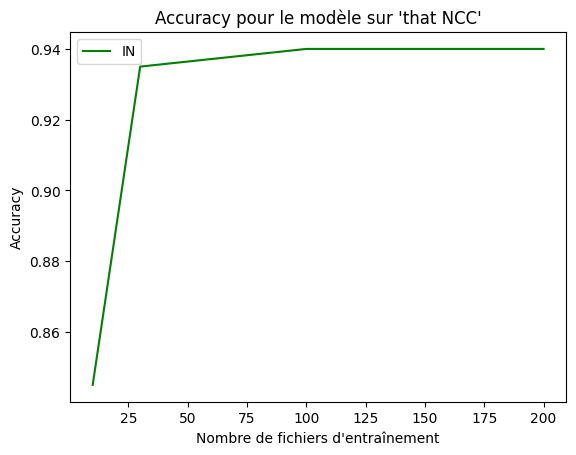

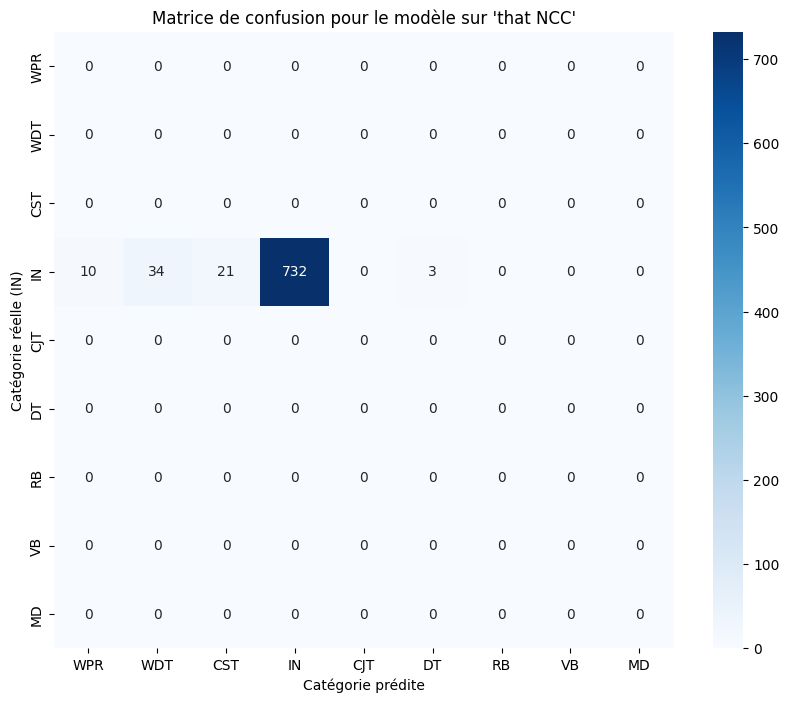

Précision pour chaque catégorie:
WPR: 0.0000
WDT: 0.0000
CST: 0.0000
IN: 1.0000
CJT: 0.0000
DT: 0.0000
RB: 0.0000
VB: 0.0000
MD: 0.0000

Rappel pour chaque catégorie:
WPR: 0.0000
WDT: 0.0000
CST: 0.0000
IN: 0.9150
CJT: 0.0000
DT: 0.0000
RB: 0.0000
VB: 0.0000
MD: 0.0000


In [449]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialisation des catégories de prédictions
categories = ['WPR', 'WDT', 'CST', 'IN', 'CJT', 'DT', 'RB', 'VB', 'MD']

# Dictionnaire pour stocker les résultats
path = "tests_results_after_retrain/"
nbr = [10, 30, 100, 200]
n_results = {}

# Vérification si le répertoire existe
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for n in nbr:
        file_path = path + "NNC_results_" + str(n) + ".txt"
        
        # Vérification de l'existence du fichier avant de l'ouvrir
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                tmp = {
                     'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_IN': content.count("that\tIN"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT"),
                    'n_RB': content.count("that\tRB"), 
                    'n_VB': content.count("that\tVB"),
                    'n_MD': content.count("that\tMD")
                }
            n_results[str(n)] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")
    
    # Vous pouvez maintenant afficher ou traiter `n_results` comme nécessaire
    print(n_results)

# Calcul de l'accuracy pour 'IN' uniquement
accuracy_in = []

# Remplir accuracy_in uniquement si l'entrée correspondante existe dans n_results
for n in nbr:
    if str(n) in n_results:  # Assurez-vous qu'il y a des données pour cette valeur de n
        accuracy_in.append((n_results[str(n)]['n_IN']) / 200)
    else:
        accuracy_in.append(0)  # Ou une autre valeur par défaut pour les données manquantes

# Tracer le graphique de l'accuracy
plt.plot(nbr, accuracy_in, "g", label="IN")
plt.title("Accuracy pour le modèle sur 'that NCC'")
plt.xlabel("Nombre de fichiers d'entraînement")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("IN_accuracy.png")

# Matrice de confusion pour la catégorie 'IN'
confusion_matrix = np.zeros((len(categories), len(categories)))

# Si le répertoire existe
if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"NNC_results_{n}.txt")
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Compte les occurrences de "that" avec différentes catégories
                for predicted_category in categories:
                    count = content.count(f"that\t{predicted_category}")
                    if predicted_category == 'IN':  # La catégorie réelle est toujours 'IN'
                        confusion_matrix[categories.index('IN'), categories.index(predicted_category)] += count
                    else:
                        confusion_matrix[categories.index('IN'), categories.index(predicted_category)] += count

        else:
            print(f"File '{file_path}' not found. Skipping...")

    # Affichage de la matrice de confusion sous forme de heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title("Matrice de confusion pour le modèle sur 'that NCC'")
    plt.xlabel("Catégorie prédite")
    plt.ylabel("Catégorie réelle (IN)")
    plt.show()

else:
    print(f"Directory '{path}' does not exist!")

# Calcul des métriques de précision et de rappel pour 'IN'
TP = {category: 0 for category in categories}
FP = {category: 0 for category in categories}
FN = {category: 0 for category in categories}

if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"NNC_results_{n}.txt")
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                for predicted_category in categories:
                    count = content.count(f"that\t{predicted_category}")
                    
                    # Calcul des TP, FP, FN pour 'IN'
                    if predicted_category == 'IN':  # La catégorie réelle est toujours 'IN'
                        TP['IN'] += count  # Vrais positifs pour 'IN'
                    else:
                        FP[predicted_category] += count  # Faux positifs pour les autres catégories
                        FN['IN'] += count  # Faux négatifs pour 'IN'
                
        else:
            print(f"File '{file_path}' not found. Skipping...")

    # Calcul des métriques de précision et de rappel
    precision = {}
    recall = {}
    for category in categories:
        # Calcul de la précision et du rappel pour chaque catégorie
        if TP[category] + FP[category] > 0:
            precision[category] = TP[category] / (TP[category] + FP[category])
        else:
            precision[category] = 0
        
        if TP[category] + FN[category] > 0:
            recall[category] = TP[category] / (TP[category] + FN[category])
        else:
            recall[category] = 0

    # Affichage des résultats
    print("Précision pour chaque catégorie:")
    for category in categories:
        print(f"{category}: {precision[category]:.4f}")
    
    print("\nRappel pour chaque catégorie:")
    for category in categories:
        print(f"{category}: {recall[category]:.4f}")
    
else:
    print(f"Directory '{path}' does not exist!")


### <u>On  the that  adverbial  data predictions :</u>

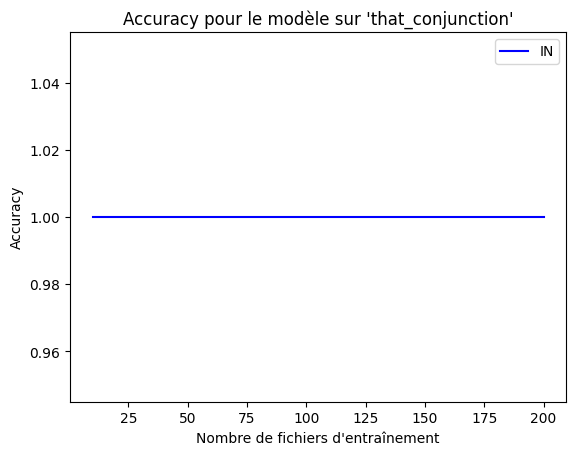

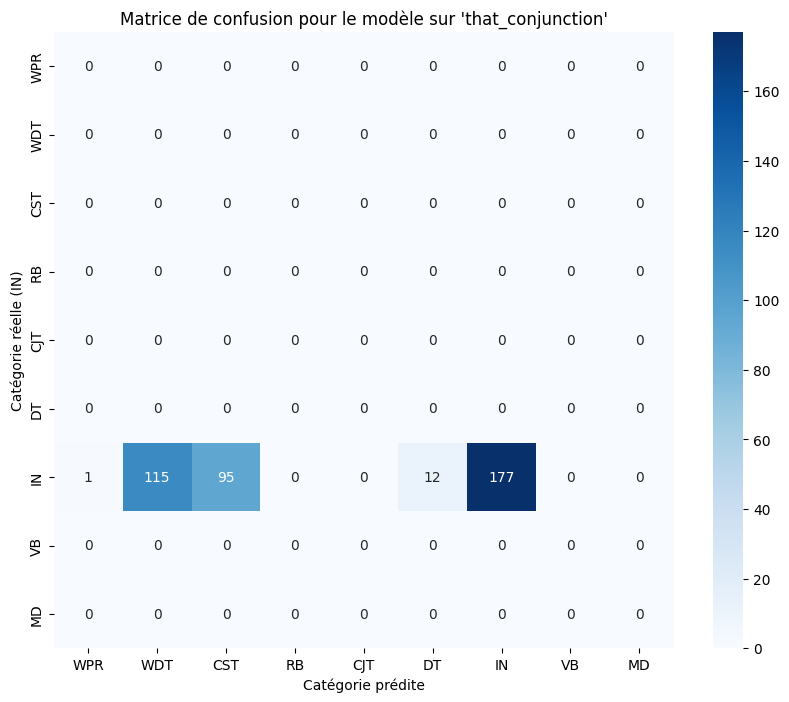

Précision pour chaque catégorie:
WPR: 0.0000
WDT: 0.0000
CST: 0.0000
RB: 0.0000
CJT: 0.0000
DT: 0.0000
IN: 1.0000
VB: 0.0000
MD: 0.0000

Rappel pour chaque catégorie:
WPR: 0.0000
WDT: 0.0000
CST: 0.0000
RB: 0.0000
CJT: 0.0000
DT: 0.0000
IN: 0.8200
VB: 0.0000
MD: 0.0000


In [458]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialisation des catégories de prédictions
categories = ['WPR', 'WDT', 'CST', 'RB', 'CJT', 'DT', 'IN', 'VB', 'MD']

# Dictionnaire pour stocker les résultats
path = "tests_results_after_retrain/"
nbr = [10, 30, 100, 200]
n_results = {}

# Si le répertoire existe
if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"that_adv_results_{n}.txt")  # Remplacer "that_adv" par "that_conjunction"
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                tmp = {
                    'n_CS': content.count("that\tCS"),
                    'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_RB': content.count("that\tRB"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT"),
                    'n_IN': content.count("that\tIN"),
                    'n_VB': content.count("that\tVB"),
                    'n_MD': content.count("that\tMD")
                }
            n_results[str(n)] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

    # Calcul de l'accuracy pour 'IN'
    accuracy_in = []
    for n in nbr:
        if str(n) in n_results:
            TP_in = n_results[str(n)]['n_IN']
            TN_in = sum(n_results[str(n)].values()) - TP_in - n_results[str(n)]['n_IN']  # Total - TP - FN (IN)
            FP_in = sum([n_results[str(n)].get(category, 0) for category in categories if category != 'IN'])
            FN_in = 0  # Pas de FN spécifique pour 'IN' (ici c'est la catégorie cible)

            accuracy_in_value = (TP_in + TN_in) / (TP_in + TN_in + FP_in + FN_in) if (TP_in + TN_in + FP_in + FN_in) != 0 else 0
            accuracy_in.append(accuracy_in_value)
        else:
            accuracy_in.append(0)  # Valeur par défaut pour les données manquantes

    # Tracer l'accuracy pour 'IN'
    plt.plot(nbr, accuracy_in, "b", label="IN")
    plt.title("Accuracy pour le modèle sur 'that_conjunction'")
    plt.xlabel("Nombre de fichiers d'entraînement")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig("IN_accuracy.png")
else:
    print(f"Directory '{path}' does not exist!")

# Code pour la matrice de confusion

# Initialisation de la matrice de confusion
confusion_matrix = np.zeros((len(categories), len(categories)))

# Dictionnaire pour stocker les résultats
path = "tests_results_after_retrain/"
nbr = [10, 30, 100, 200]

if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"that_adv_results_{n}.txt")  # Remplacer "that_adv" par "that_conjunction"
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                for predicted_category in categories:
                    count = content.count(f"that\t{predicted_category}")
                    confusion_matrix[categories.index('IN'), categories.index(predicted_category)] += count

    # Affichage de la matrice de confusion sous forme de heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title("Matrice de confusion pour le modèle sur 'that_conjunction'")
    plt.xlabel("Catégorie prédite")
    plt.ylabel("Catégorie réelle (IN)")
    plt.show()
else:
    print(f"Directory '{path}' does not exist!")

# Calcul des métriques de précision et de rappel

# Initialisation des compteurs de TP, FP, FN
TP = {category: 0 for category in categories}
FP = {category: 0 for category in categories}
FN = {category: 0 for category in categories}

# Dictionnaire pour stocker les résultats
path = "tests_results_after_retrain/"
nbr = [10, 30, 100, 200]

if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"that_conjunction_results_{n}.txt")  # Remplacer "that_adv" par "that_conjunction"
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                for predicted_category in categories:
                    count = content.count(f"that\t{predicted_category}")
                    
                    # Calcul des TP, FP, FN pour chaque catégorie
                    if predicted_category == 'IN':  # La catégorie réelle est maintenant 'IN'
                        TP['IN'] += count  # Vrais positifs pour 'IN'
                    else:
                        FP[predicted_category] += count  # Faux positifs pour les autres catégories
                        FN['IN'] += count  # Faux négatifs pour 'IN'

    # Calcul des métriques de précision et de rappel
    precision = {}
    recall = {}
    for category in categories:
        if TP[category] + FP[category] > 0:
            precision[category] = TP[category] / (TP[category] + FP[category])
        else:
            precision[category] = 0
        
        if TP[category] + FN[category] > 0:
            recall[category] = TP[category] / (TP[category] + FN[category])
        else:
            recall[category] = 0

    # Affichage des résultats
    print("Précision pour chaque catégorie:")
    for category in categories:
        print(f"{category}: {precision[category]:.4f}")
    
    print("\nRappel pour chaque catégorie:")
    for category in categories:
        print(f"{category}: {recall[category]:.4f}")
    
else:
    print(f"Directory '{path}' does not exist!")


### <u>On  the that  conjunction data predictions :</u>

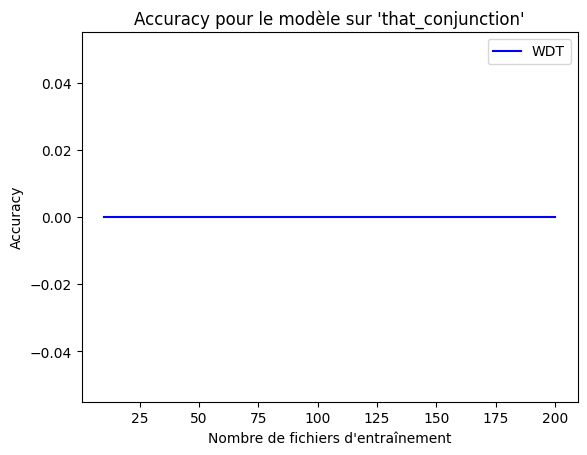

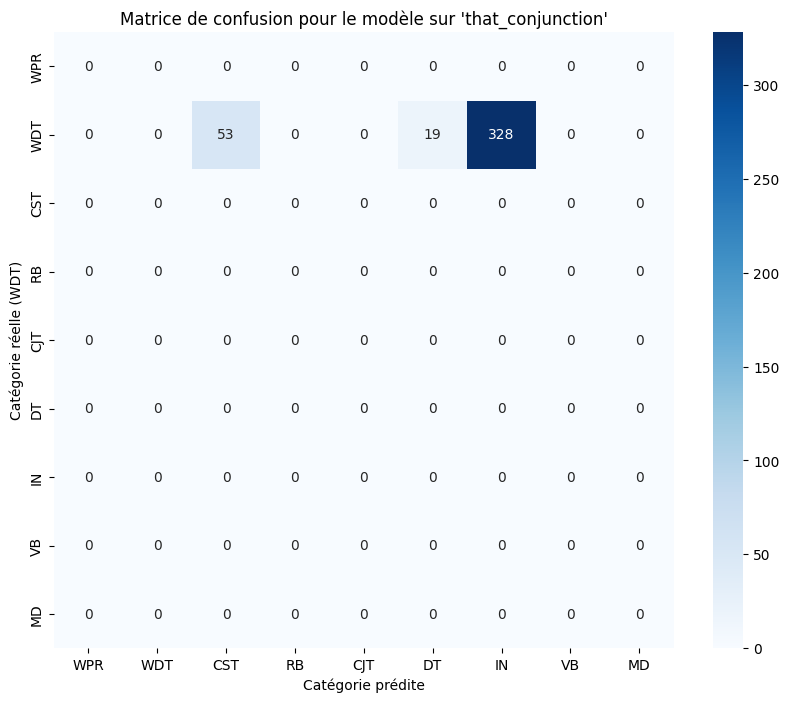

Précision pour chaque catégorie:
WPR: 0.0000
WDT: 0.0000
CST: 0.0000
RB: 0.0000
CJT: 0.0000
DT: 0.0000
IN: 0.0000
VB: 0.0000
MD: 0.0000

Rappel pour chaque catégorie:
WPR: 0.0000
WDT: 0.0000
CST: 0.0000
RB: 0.0000
CJT: 0.0000
DT: 0.0000
IN: 0.0000
VB: 0.0000
MD: 0.0000


In [459]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialisation des catégories de prédictions
categories = ['WPR', 'WDT', 'CST', 'RB', 'CJT', 'DT', 'IN', 'VB', 'MD']

# Dictionnaire pour stocker les résultats
path = "tests_results_after_retrain/"
nbr = [10, 30, 100, 200]
n_results = {}

# Si le répertoire existe
if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"that_conjunction_results_{n}.txt")  # Remplacer "that_adv" par "that_conjunction"
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                tmp = {
                    'n_CS': content.count("that\tCS"),
                    'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_RB': content.count("that\tRB"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT"),
                    'n_IN': content.count("that\tIN"),
                    'n_VB': content.count("that\tVB"),
                    'n_MD': content.count("that\tMD")
                }
            n_results[str(n)] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

    # Calcul de l'accuracy pour WDT
    accuracy_wdt = []
    for n in nbr:
        if str(n) in n_results:
            TP_WDT = n_results[str(n)]['n_WDT']
            FP_WDT = n_results[str(n)]['n_WPR'] + n_results[str(n)]['n_CST'] + n_results[str(n)]['n_CJT'] + n_results[str(n)]['n_DT'] + n_results[str(n)]['n_IN'] + n_results[str(n)]['n_VB'] + n_results[str(n)]['n_MD']
            FN_WDT = n_results[str(n)]['n_RB'] + n_results[str(n)]['n_WPR'] + n_results[str(n)]['n_CST'] + n_results[str(n)]['n_CJT'] + n_results[str(n)]['n_DT'] + n_results[str(n)]['n_IN'] + n_results[str(n)]['n_VB'] + n_results[str(n)]['n_MD']
            TN_WDT = 200 - TP_WDT - FP_WDT - FN_WDT  # Total des cas - TP - FP - FN

            accuracy = (TP_WDT + TN_WDT) / (TP_WDT + TN_WDT + FP_WDT + FN_WDT)  # Formule de l'accuracy
            accuracy_wdt.append(accuracy)
        else:
            accuracy_wdt.append(0)  # Valeur par défaut pour les données manquantes

    # Tracer l'accuracy pour WDT
    plt.plot(nbr, accuracy_wdt, "b", label="WDT")
    plt.title("Accuracy pour le modèle sur 'that_conjunction'")
    plt.xlabel("Nombre de fichiers d'entraînement")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig("WDT_accuracy.png")
    plt.show()

else:
    print(f"Directory '{path}' does not exist!")

# Code pour la matrice de confusion

# Initialisation de la matrice de confusion
confusion_matrix = np.zeros((len(categories), len(categories)))

# Dictionnaire pour stocker les résultats
path = "tests_results_after_retrain/"
nbr = [10, 30, 100, 200]

if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"that_conjunction_results_{n}.txt")  # Remplacer "that_adv" par "that_conjunction"
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                for predicted_category in categories:
                    count = content.count(f"that\t{predicted_category}")
                    confusion_matrix[categories.index('WDT'), categories.index(predicted_category)] += count

    # Affichage de la matrice de confusion sous forme de heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title("Matrice de confusion pour le modèle sur 'that_conjunction'")
    plt.xlabel("Catégorie prédite")
    plt.ylabel("Catégorie réelle (WDT)")
    plt.show()

else:
    print(f"Directory '{path}' does not exist!")

# Calcul des métriques de précision et de rappel

# Initialisation des compteurs de TP, FP, FN
TP = {category: 0 for category in categories}
FP = {category: 0 for category in categories}
FN = {category: 0 for category in categories}

# Dictionnaire pour stocker les résultats
path = "tests_results_after_retrain/"
nbr = [10, 30, 100, 200]

if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"that_conjunction_results_{n}.txt")  # Remplacer "that_adv" par "that_conjunction"
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                for predicted_category in categories:
                    count = content.count(f"that\t{predicted_category}")
                    
                    # Calcul des TP, FP, FN pour chaque catégorie
                    if predicted_category == 'WDT':  # La catégorie réelle est maintenant 'WDT'
                        TP['WDT'] += count  # Vrais positifs pour 'WDT'
                    else:
                        FP[predicted_category] += count  # Faux positifs pour les autres catégories
                        FN['WDT'] += count  # Faux négatifs pour 'WDT'

    # Calcul des métriques de précision et de rappel
    precision = {}
    recall = {}
    for category in categories:
        if TP[category] + FP[category] > 0:
            precision[category] = TP[category] / (TP[category] + FP[category])
        else:
            precision[category] = 0
        
        if TP[category] + FN[category] > 0:
            recall[category] = TP[category] / (TP[category] + FN[category])
        else:
            recall[category] = 0

    # Affichage des résultats
    print("Précision pour chaque catégorie:")
    for category in categories:
        print(f"{category}: {precision[category]:.4f}")
    
    print("\nRappel pour chaque catégorie:")
    for category in categories:
        print(f"{category}: {recall[category]:.4f}")
    
else:
    print(f"Directory '{path}' does not exist!")


### <u>On  the that  determiner  data predictions :</u>

{'10': {'n_CS': 24, 'n_WPR': 1, 'n_WDT': 4, 'n_CST': 24, 'n_IN': 30, 'n_CJT': 0, 'n_DT': 13, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, '30': {'n_CS': 2, 'n_WPR': 0, 'n_WDT': 3, 'n_CST': 2, 'n_IN': 20, 'n_CJT': 0, 'n_DT': 47, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, '100': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 1, 'n_CST': 0, 'n_IN': 16, 'n_CJT': 0, 'n_DT': 55, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, '200': {'n_CS': 0, 'n_WPR': 0, 'n_WDT': 1, 'n_CST': 0, 'n_IN': 16, 'n_CJT': 0, 'n_DT': 55, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}}


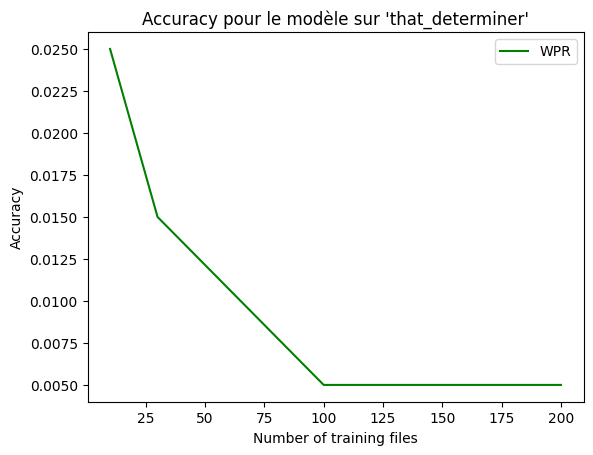

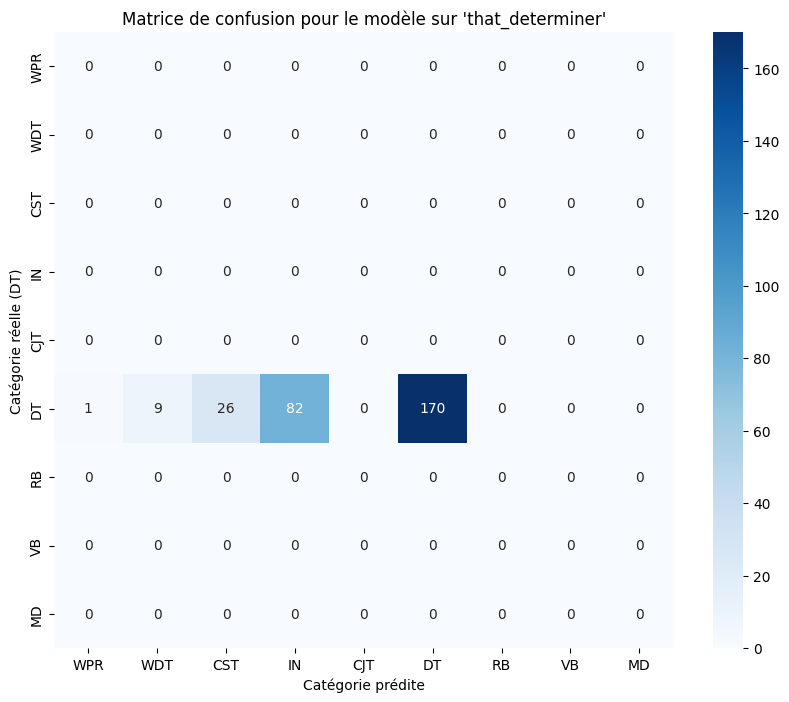

Précision pour chaque catégorie:
WPR: 0.0000
WDT: 0.0000
CST: 0.0000
IN: 0.0000
CJT: 0.0000
DT: 1.0000
RB: 0.0000
VB: 0.0000
MD: 0.0000

Rappel pour chaque catégorie:
WPR: 0.0000
WDT: 0.0000
CST: 0.0000
IN: 0.0000
CJT: 0.0000
DT: 0.5903
RB: 0.0000
VB: 0.0000
MD: 0.0000


In [460]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialisation des catégories de prédictions
categories = ['WPR', 'WDT', 'CST', 'IN', 'CJT', 'DT', 'RB', 'VB', 'MD']

# Dictionnaire pour stocker les résultats
path = "tests_results_after_retrain/"
nbr = [10, 30, 100, 200]
n_results = {}

# Vérifier si le répertoire existe
if not os.path.exists(path):
    print(f"Directory '{path}' does not exist!")
else:
    for n in nbr:
        file_path = path + "that_determiner_results_" + str(n) + ".txt"
        
        # Vérifier si le fichier existe avant de l'ouvrir
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                tmp = {
                    'n_CS': content.count("that\tCS"),
                    'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_IN': content.count("that\tIN"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT"),
                    'n_RB': content.count("that\tRB"),
                    'n_VB': content.count("that\tVB"),
                    'n_MD': content.count("that\tMD")
                }
            n_results[str(n)] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")

    print(n_results)

accuracy_rcc = []

# Remplir accuracy_rcc seulement si l'entrée existe dans n_results
for n in nbr:
    if str(n) in n_results:
        accuracy_rcc.append((n_results[str(n)]['n_WPR'] + n_results[str(n)]['n_WDT']) / 200)
    else:
        accuracy_rcc.append(0)

# Tracer le graphique
plt.plot(nbr, accuracy_rcc, "g", label="WPR")
plt.title("Accuracy pour le modèle sur 'that_determiner'")
plt.xlabel("Number of training files")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig("WPR_accuracy.png")

# Matrice de confusion
confusion_matrix = np.zeros((len(categories), len(categories)))

# Vérifier si le répertoire existe
if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"that_determiner_results_{n}.txt")
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Compte les occurrences de "that" avec différentes catégories
                for predicted_category in categories:
                    count = content.count(f"that\t{predicted_category}")
                    if predicted_category == 'DT':  # La catégorie réelle est toujours 'DT'
                        confusion_matrix[categories.index('DT'), categories.index(predicted_category)] += count
                    else:
                        confusion_matrix[categories.index('DT'), categories.index(predicted_category)] += count
        else:
            print(f"File '{file_path}' not found. Skipping...")

    # Affichage de la matrice de confusion
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title("Matrice de confusion pour le modèle sur 'that_determiner'")
    plt.xlabel("Catégorie prédite")
    plt.ylabel("Catégorie réelle (DT)")
    plt.show()
else:
    print(f"Directory '{path}' does not exist!")

# Calcul des métriques de précision et de rappel
TP = {category: 0 for category in categories}
FP = {category: 0 for category in categories}
FN = {category: 0 for category in categories}

if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"that_determiner_results_{n}.txt")
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Compte les occurrences de "that" avec différentes catégories
                for predicted_category in categories:
                    count = content.count(f"that\t{predicted_category}")
                    
                    # Pour chaque catégorie prédite, on calcule les TP, FP, FN
                    if predicted_category == 'DT':  # La catégorie réelle est toujours 'DT'
                        TP['DT'] += count
                    else:
                        FP[predicted_category] += count
                        FN['DT'] += count
        else:
            print(f"File '{file_path}' not found. Skipping...")

    # Calcul des métriques de précision et de rappel
    precision = {}
    recall = {}
    for category in categories:
        if TP[category] + FP[category] > 0:
            precision[category] = TP[category] / (TP[category] + FP[category])
        else:
            precision[category] = 0
        
        if TP[category] + FN[category] > 0:
            recall[category] = TP[category] / (TP[category] + FN[category])
        else:
            recall[category] = 0

    print("Précision pour chaque catégorie:")
    for category in categories:
        print(f"{category}: {precision[category]:.4f}")
    
    print("\nRappel pour chaque catégorie:")
    for category in categories:
        print(f"{category}: {recall[category]:.4f}")
else:
    print(f"Directory '{path}' does not exist!")


### <u>On  the that pronoun   data predictions :</u>

{'10': {'n_CS': 2, 'n_WPR': 0, 'n_WDT': 11, 'n_CST': 2, 'n_IN': 87, 'n_CJT': 0, 'n_DT': 0, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, '30': {'n_CS': 1, 'n_WPR': 3, 'n_WDT': 20, 'n_CST': 1, 'n_IN': 76, 'n_CJT': 0, 'n_DT': 0, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, '100': {'n_CS': 4, 'n_WPR': 0, 'n_WDT': 20, 'n_CST': 4, 'n_IN': 76, 'n_CJT': 0, 'n_DT': 0, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}, '200': {'n_CS': 0, 'n_WPR': 2, 'n_WDT': 24, 'n_CST': 0, 'n_IN': 74, 'n_CJT': 0, 'n_DT': 0, 'n_RB': 0, 'n_VB': 0, 'n_MD': 0}}


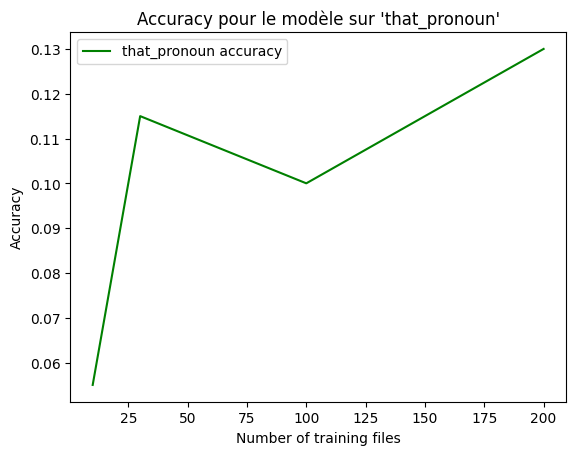

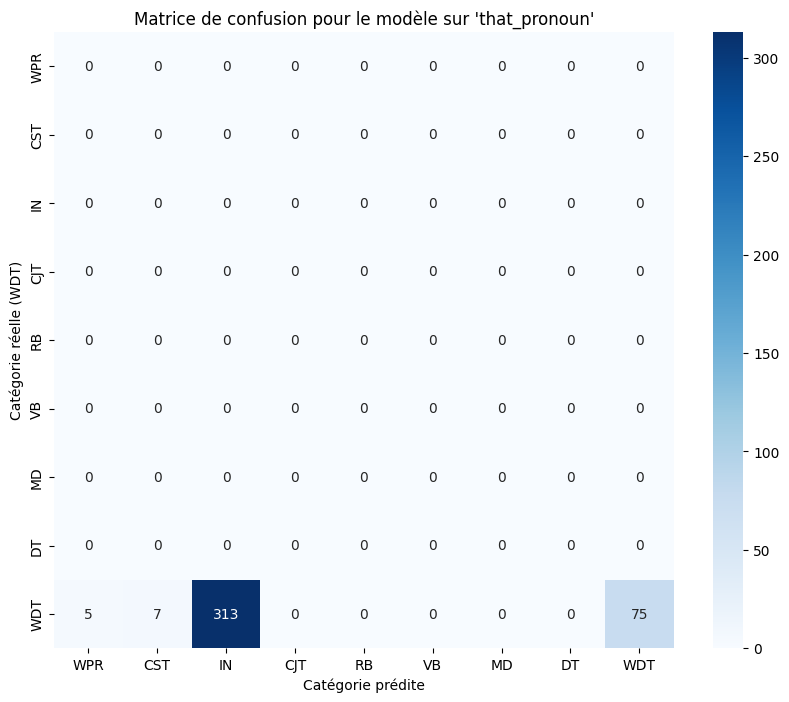

Précision pour chaque catégorie:
WPR: 0.0000
CST: 0.0000
IN: 0.0000
CJT: 0.0000
RB: 0.0000
VB: 0.0000
MD: 0.0000
DT: 0.0000
WDT: 1.0000

Rappel pour chaque catégorie:
WPR: 0.0000
CST: 0.0000
IN: 0.0000
CJT: 0.0000
RB: 0.0000
VB: 0.0000
MD: 0.0000
DT: 0.0000
WDT: 0.1875


In [461]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialisation des catégories de prédictions (fusion de DT et WDT)
categories = ['WPR', 'CST', 'IN', 'CJT', 'RB', 'VB', 'MD', 'DT', 'WDT']

# Initialisation des compteurs de TP, FP, FN
TP = {category: 0 for category in categories}
FP = {category: 0 for category in categories}
FN = {category: 0 for category in categories}

# Dictionnaire pour stocker les résultats
path = "tests_results_after_retrain/"
nbr = [10, 30, 100, 200]
n_results = {}

# Si le répertoire existe
if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"that_pronoun_results_{n}.txt")
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                tmp = {
                    'n_CS': content.count("that\tCS"),
                    'n_WPR': content.count("that\tWPR"),
                    'n_WDT': content.count("that\tWDT"),
                    'n_CST': content.count("that\tCST"),
                    'n_IN': content.count("that\tIN"),
                    'n_CJT': content.count("that\tCJT"),
                    'n_DT': content.count("that\tDT"),
                    'n_RB': content.count("that\tRB"), 
                    'n_VB': content.count("that\tVB"),
                    'n_MD': content.count("that\tMD")
                }
            n_results[str(n)] = tmp
        else:
            print(f"File '{file_path}' not found. Skipping...")
    
    # Affichage des résultats
    print(n_results)
    
    accuracy_that_pronoun = []

    # Calcul de l'accuracy
    for n in nbr:
        if str(n) in n_results:  # Assurez-vous qu'il y a des données pour cette valeur de n
            accuracy_that_pronoun.append(
                (n_results[str(n)]['n_WPR'] + n_results[str(n)]['n_WDT'] + n_results[str(n)]['n_DT']) / 200
            )
        else:
            accuracy_that_pronoun.append(0)  # Ou une autre valeur par défaut pour les données manquantes

    # Tracé de la courbe d'accuracy
    plt.plot(nbr, accuracy_that_pronoun, "g", label="that_pronoun accuracy")
    plt.title("Accuracy pour le modèle sur 'that_pronoun'")
    plt.xlabel("Number of training files")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.savefig("that_pronoun_accuracy.png")
    plt.show()

else:
    print(f"Directory '{path}' does not exist!")

# Initialisation de la matrice de confusion avec des zéros
confusion_matrix = np.zeros((len(categories), len(categories)))

# Calcul de la matrice de confusion
if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"that_pronoun_results_{n}.txt")
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Compte les occurrences de "that" avec différentes catégories
                for predicted_category in categories:
                    # Exemple de calcul pour chaque catégorie
                    count = content.count(f"that\t{predicted_category}")
                    
                    if predicted_category == 'WDT':  # Fusion de DT et WDT en une seule catégorie
                        confusion_matrix[categories.index('WDT'), categories.index(predicted_category)] += count
                    else:
                        confusion_matrix[categories.index('WDT'), categories.index(predicted_category)] += count

    # Affichage de la matrice de confusion sous forme de heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(confusion_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
    plt.title("Matrice de confusion pour le modèle sur 'that_pronoun'")
    plt.xlabel("Catégorie prédite")
    plt.ylabel("Catégorie réelle (WDT)")
    plt.show()

else:
    print(f"Directory '{path}' does not exist!")

# Dictionnaire pour stocker les métriques de précision et de rappel
precision = {}
recall = {}

# Calcul des métriques de précision et de rappel
if os.path.exists(path):
    for n in nbr:
        file_path = os.path.join(path, f"that_pronoun_results_{n}.txt")
        
        if os.path.exists(file_path):
            with open(file_path, "r", encoding="UTF-8") as fo:
                content = fo.read()
                # Compte les occurrences de "that" avec différentes catégories
                for predicted_category in categories:
                    count = content.count(f"that\t{predicted_category}")
                    
                    # Pour chaque catégorie prédite, on calcule les TP, FP, FN
                    if predicted_category == 'WDT':  # La catégorie réelle est fusionnée DT et WDT
                        TP['WDT'] += count  # Les vrais positifs pour 'DT/WDT'
                    else:
                        FP[predicted_category] += count  # Faux positifs pour les autres catégories
                        FN['WDT'] += count  # Faux négatifs pour 'DT/WDT'

    # Calcul des métriques de précision et de rappel
    for category in categories:
        # Calcul de la précision et du rappel pour chaque catégorie
        if TP[category] + FP[category] > 0:
            precision[category] = TP[category] / (TP[category] + FP[category])
        else:
            precision[category] = 0
        
        if TP[category] + FN[category] > 0:
            recall[category] = TP[category] / (TP[category] + FN[category])
        else:
            recall[category] = 0

    # Affichage des résultats
    print("Précision pour chaque catégorie:")
    for category in categories:
        print(f"{category}: {precision[category]:.4f}")
    
    print("\nRappel pour chaque catégorie:")
    for category in categories:
        print(f"{category}: {recall[category]:.4f}")
    
else:
    print(f"Directory '{path}' does not exist!")


## Bonus: Analysis of *That* in Nominal Complements
- Study the incorporation of the [+singular] or [+plural] feature using tools like *skweak* for feature engineering.
- Analyze *that* as a pronoun in sentences like *I love that!*.